In [15]:
import numpy as np
import scipy
import scipy.constants
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
c = scipy.constants.c
print(c)

299792458.0


In [17]:
df1 =pd.read_excel('/Volumes/MBQD_data/AION/Data/2024/02/02/M3_a_02.02.2024,15.22,256.03µW.xlsx')

In [18]:
t1 = df1.get("Time  [ms]")
t1 = t1[::2]
t1 = t1.to_numpy()

wavelength = df1.get("Signal 1  Wavelength, vac.  [nm]")
freq = c/wavelength

freq = freq[::2]
freq = freq.to_numpy()

Text(0, 0.5, 'Frequency (GHz)')

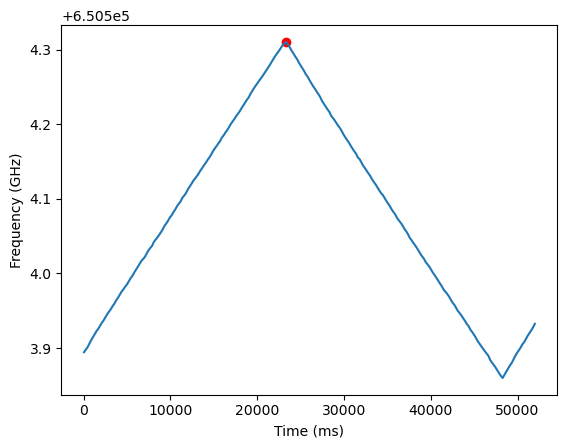

In [19]:
from scipy.signal import find_peaks
maxima_indices1, _ = find_peaks(freq, prominence=0.01)
plt.plot(t1, freq, label='Original Data')
plt.scatter(t1[maxima_indices1], freq[maxima_indices1], color='red', label='Maxima')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (GHz)')

Text(0, 0.5, 'Frequency (GHz)')

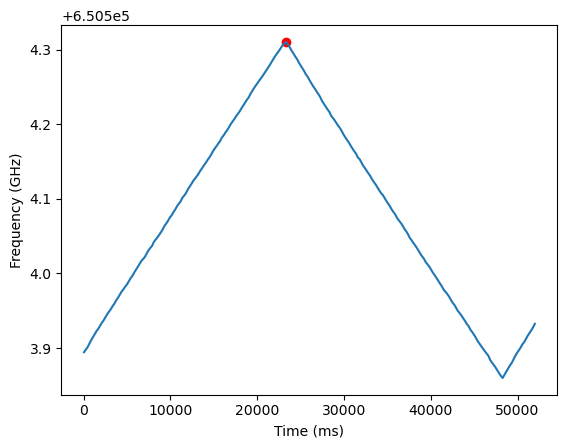

In [20]:
from scipy.signal import find_peaks
maxima_indices1, _ = find_peaks(freq, prominence=0.01)
plt.plot(t1, freq, label='Original Data')
plt.scatter(t1[maxima_indices1], freq[maxima_indices1], color='red', label='Maxima')
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (GHz)')

In [21]:
T1 = t1[maxima_indices1]
print(maxima_indices1,T1)

[111] [23368.7076]


In [22]:
df2 = pd.read_csv('/Volumes/MBQD_data/AION/Data/2024/02/02/test_a_20240202-0001.csv')

/var/folders/4c/r3ydc0x11r9d96q94sm46lhr0000gq/T/ipykernel_67890/3810690846.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/Volumes/MBQD_data/AION/Data/2024/02/02/test_a_20240202-0001.csv')


In [23]:
df2
t2 = df2.iloc[2:,0] #convert to ms
Fluor = df2.iloc[2:,1]

t2 = [float(i)*1000 for i in t2] #convert to ms
Fluor = [float(i) for i in Fluor]

In [24]:
t2,Fluor

([0.05,
  0.1,
  0.15,
  0.2,
  0.25,
  0.3,
  0.35,
  0.4,
  0.45,
  0.5,
  0.55,
  0.6,
  0.65,
  0.7,
  0.75,
  0.8,
  0.85,
  0.9,
  0.95,
  1.0,
  1.05,
  1.1,
  1.15,
  1.2,
  1.25,
  1.3,
  1.35,
  1.4,
  1.45,
  1.5,
  1.55,
  1.6,
  1.65,
  1.7,
  1.75,
  1.8,
  1.85,
  1.9,
  1.95,
  2.0,
  2.0500000000000003,
  2.1,
  2.15,
  2.2,
  2.25,
  2.3,
  2.35,
  2.4,
  2.4499999999999997,
  2.5,
  2.5500000000000003,
  2.6,
  2.65,
  2.7,
  2.75,
  2.8,
  2.85,
  2.9,
  2.9499999999999997,
  3.0,
  3.0500000000000003,
  3.1,
  3.15,
  3.2,
  3.25,
  3.3,
  3.35,
  3.4,
  3.4499999999999997,
  3.5,
  3.5500000000000003,
  3.6,
  3.65,
  3.7,
  3.75,
  3.8,
  3.85,
  3.9,
  3.95,
  4.0,
  4.05,
  4.1000000000000005,
  4.15,
  4.2,
  4.25,
  4.3,
  4.35,
  4.4,
  4.45,
  4.5,
  4.55,
  4.6,
  4.6499999999999995,
  4.7,
  4.75,
  4.8,
  4.8500000000000005,
  4.8999999999999995,
  4.95,
  5.0,
  5.05,
  5.1000000000000005,
  5.15,
  5.2,
  5.25,
  5.3,
  5.35,
  5.4,
  5.45,
  5.5,
  5.

In [25]:
# # df2 =pd.read_csv('test_a.csv')

# t2 = df2.get("Time(s)")
# Fluor = df2.get("Channel A(mV)")
# t2 = t2*1000

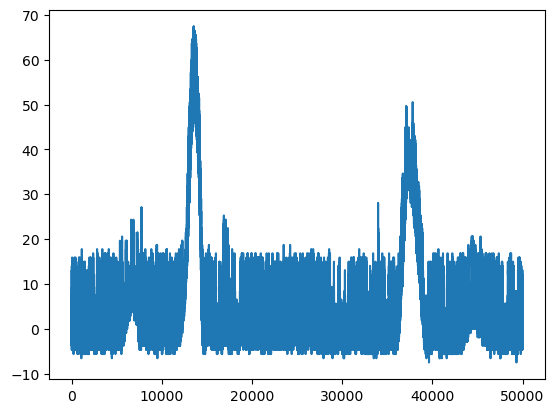

In [26]:
# plt.rcParams["figure.figsize"] = (30, 20)
plt.plot(t2,Fluor)

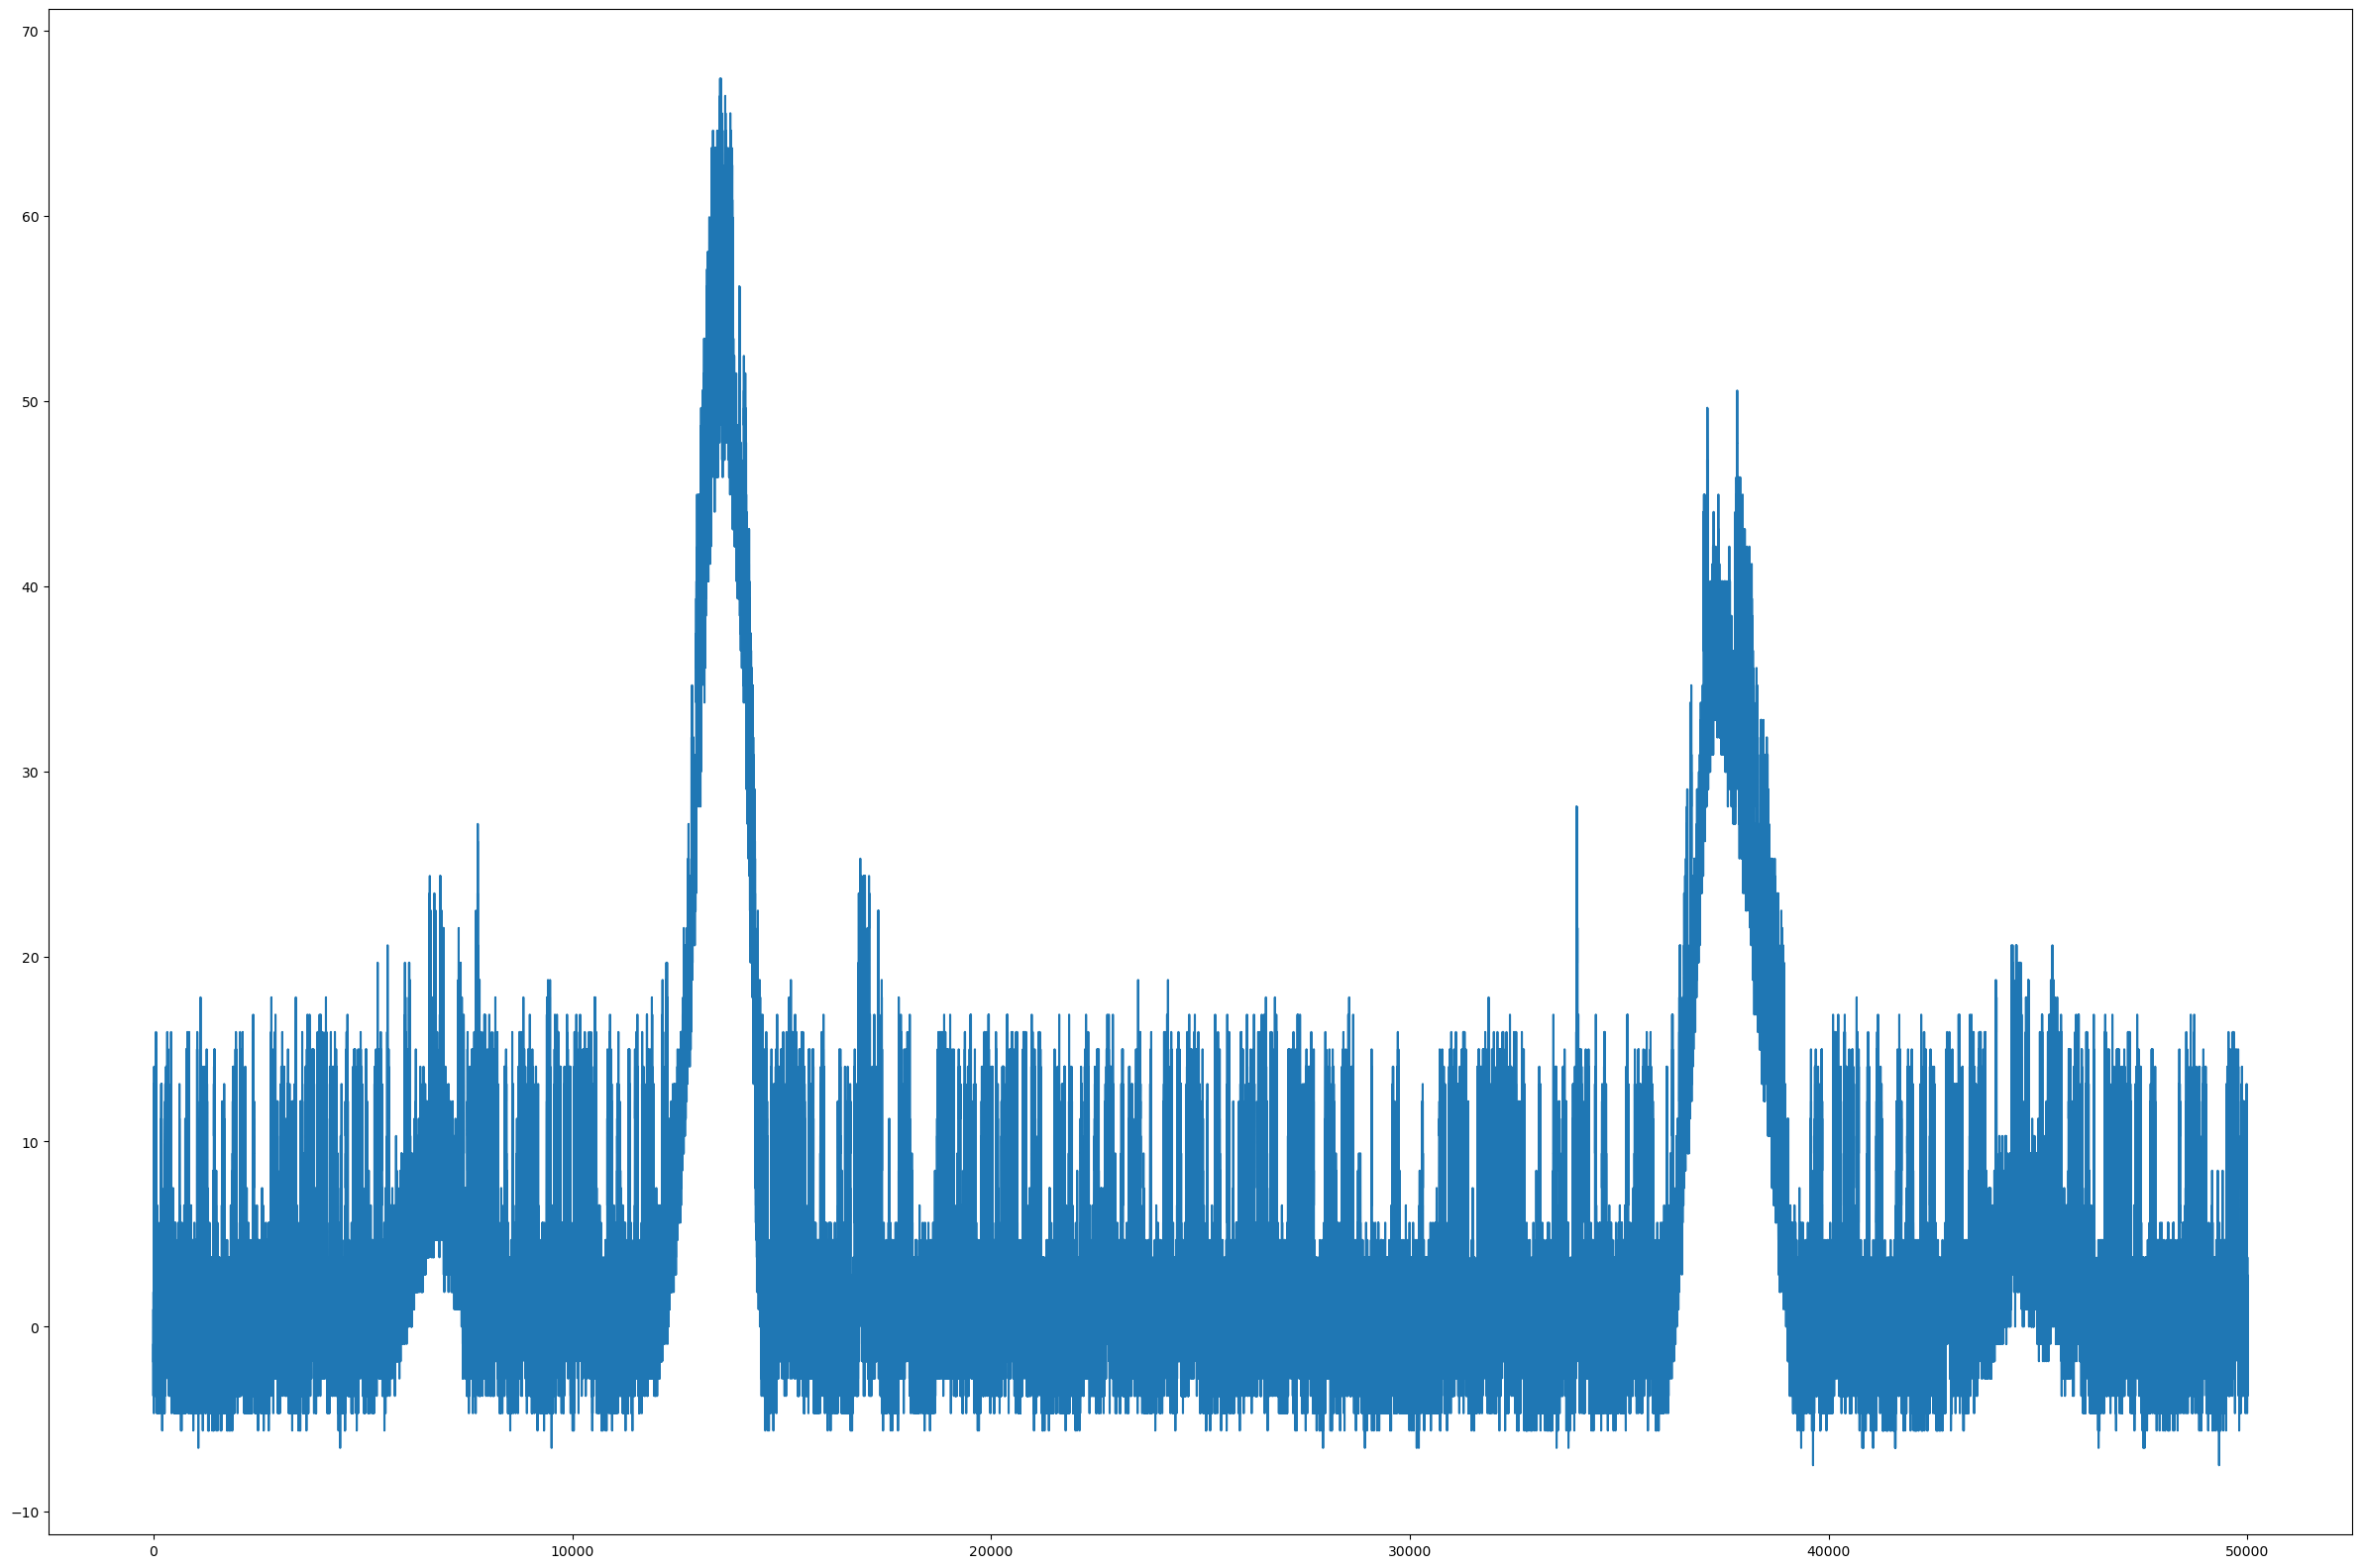

In [27]:
plt.rcParams["figure.figsize"] = (30, 20)
plt.plot(t2,Fluor)

In [28]:
from scipy.signal import savgol_filter
#w = savgol_filter(Fluor, 20001, 2)
#plt.plot(t2, w)

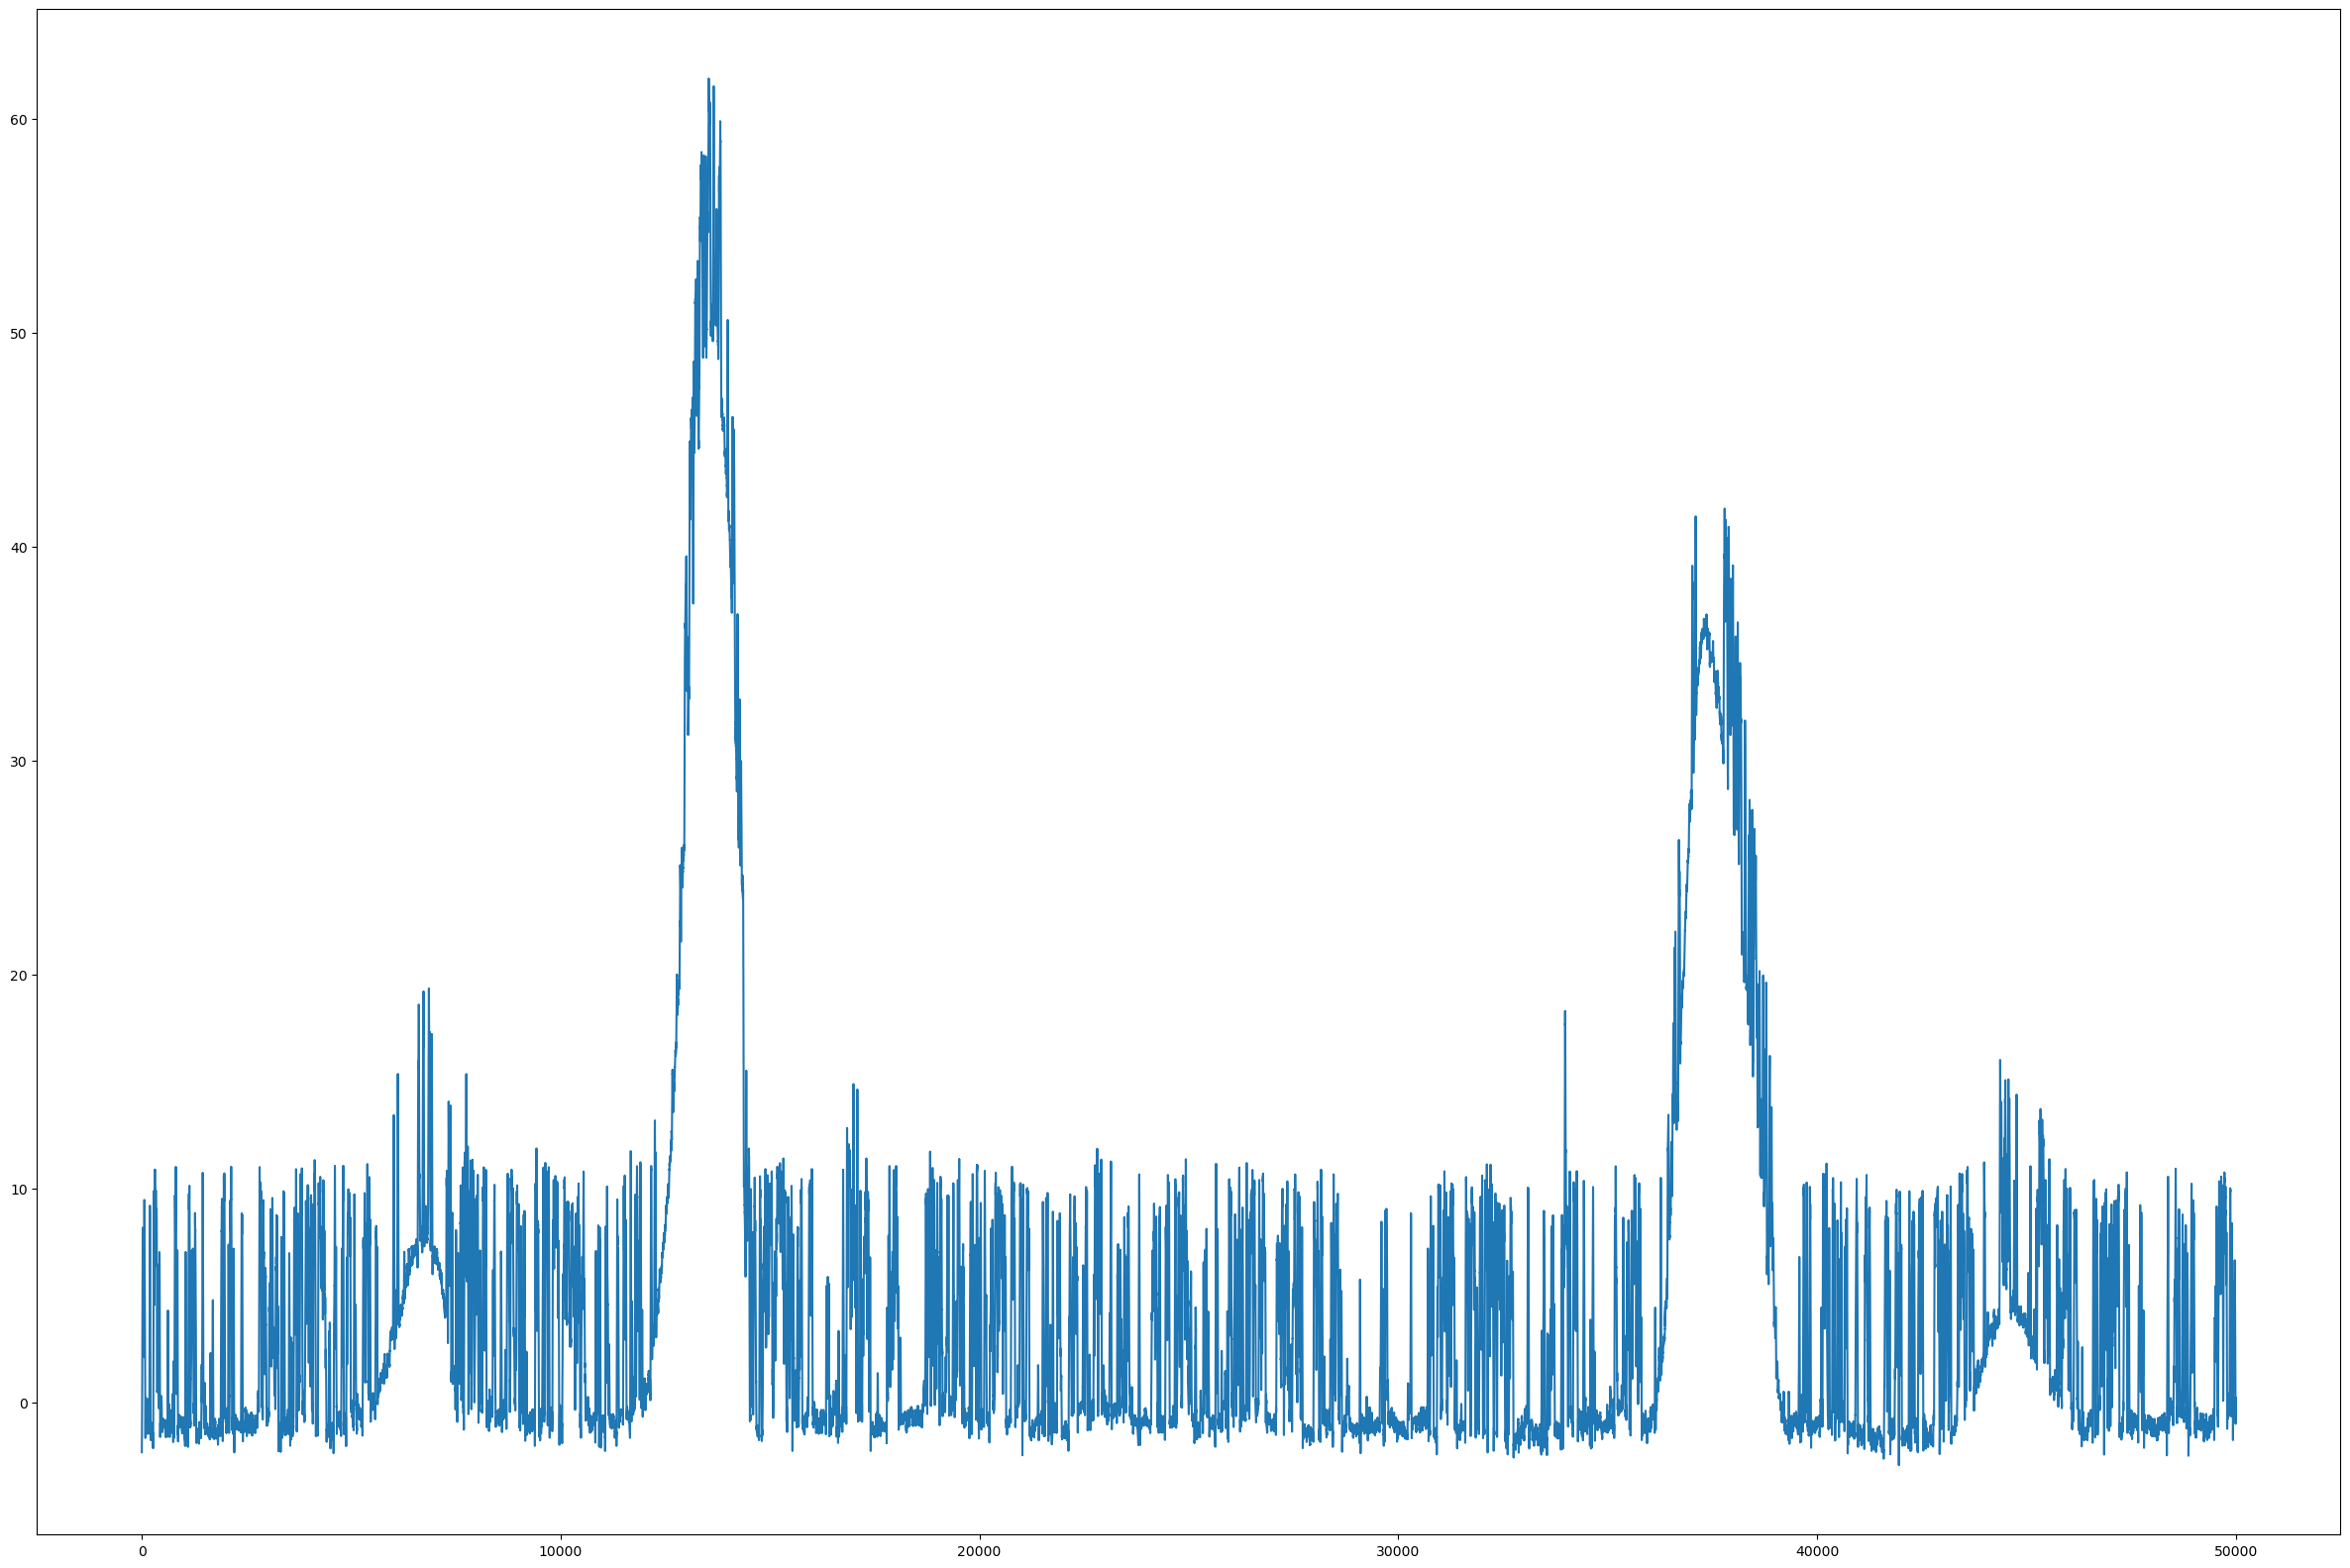

In [29]:
from scipy.signal import savgol_filter
w2 = savgol_filter(Fluor, 501, 2)
plt.plot(t2, w2)

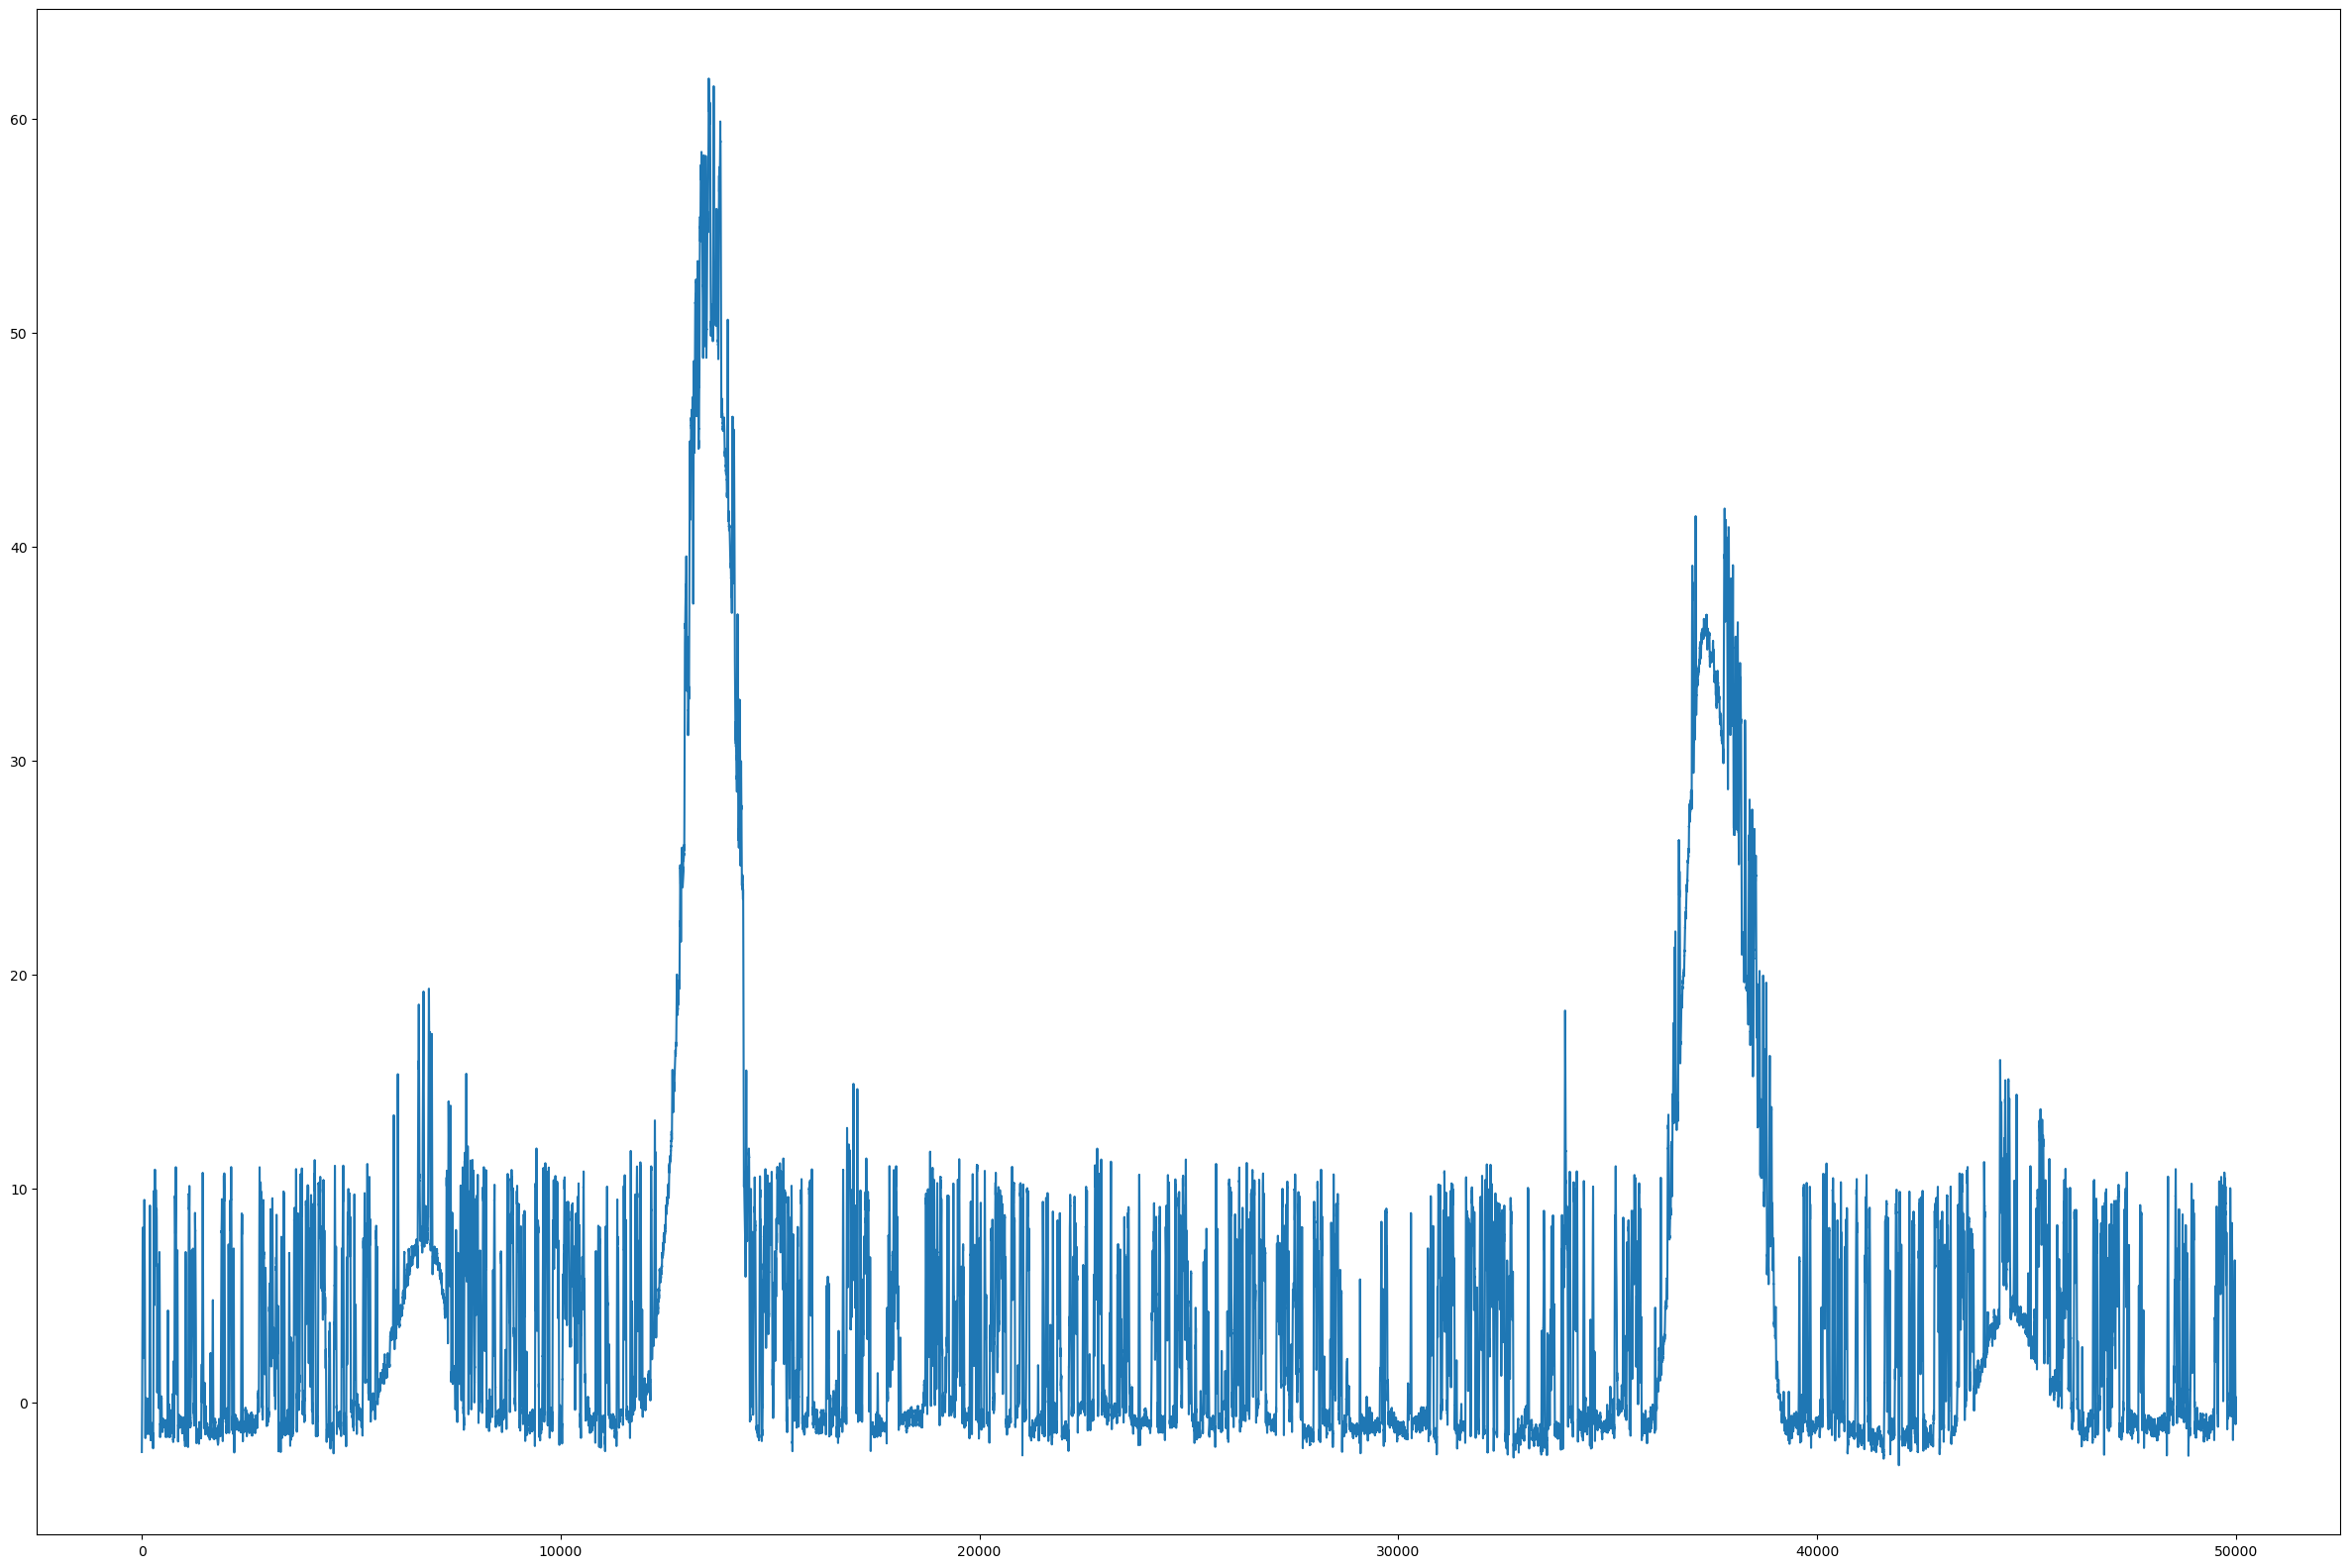

In [30]:
from scipy.signal import savgol_filter
w2 = savgol_filter(Fluor, 500, 2)
plt.plot(t2, w2)

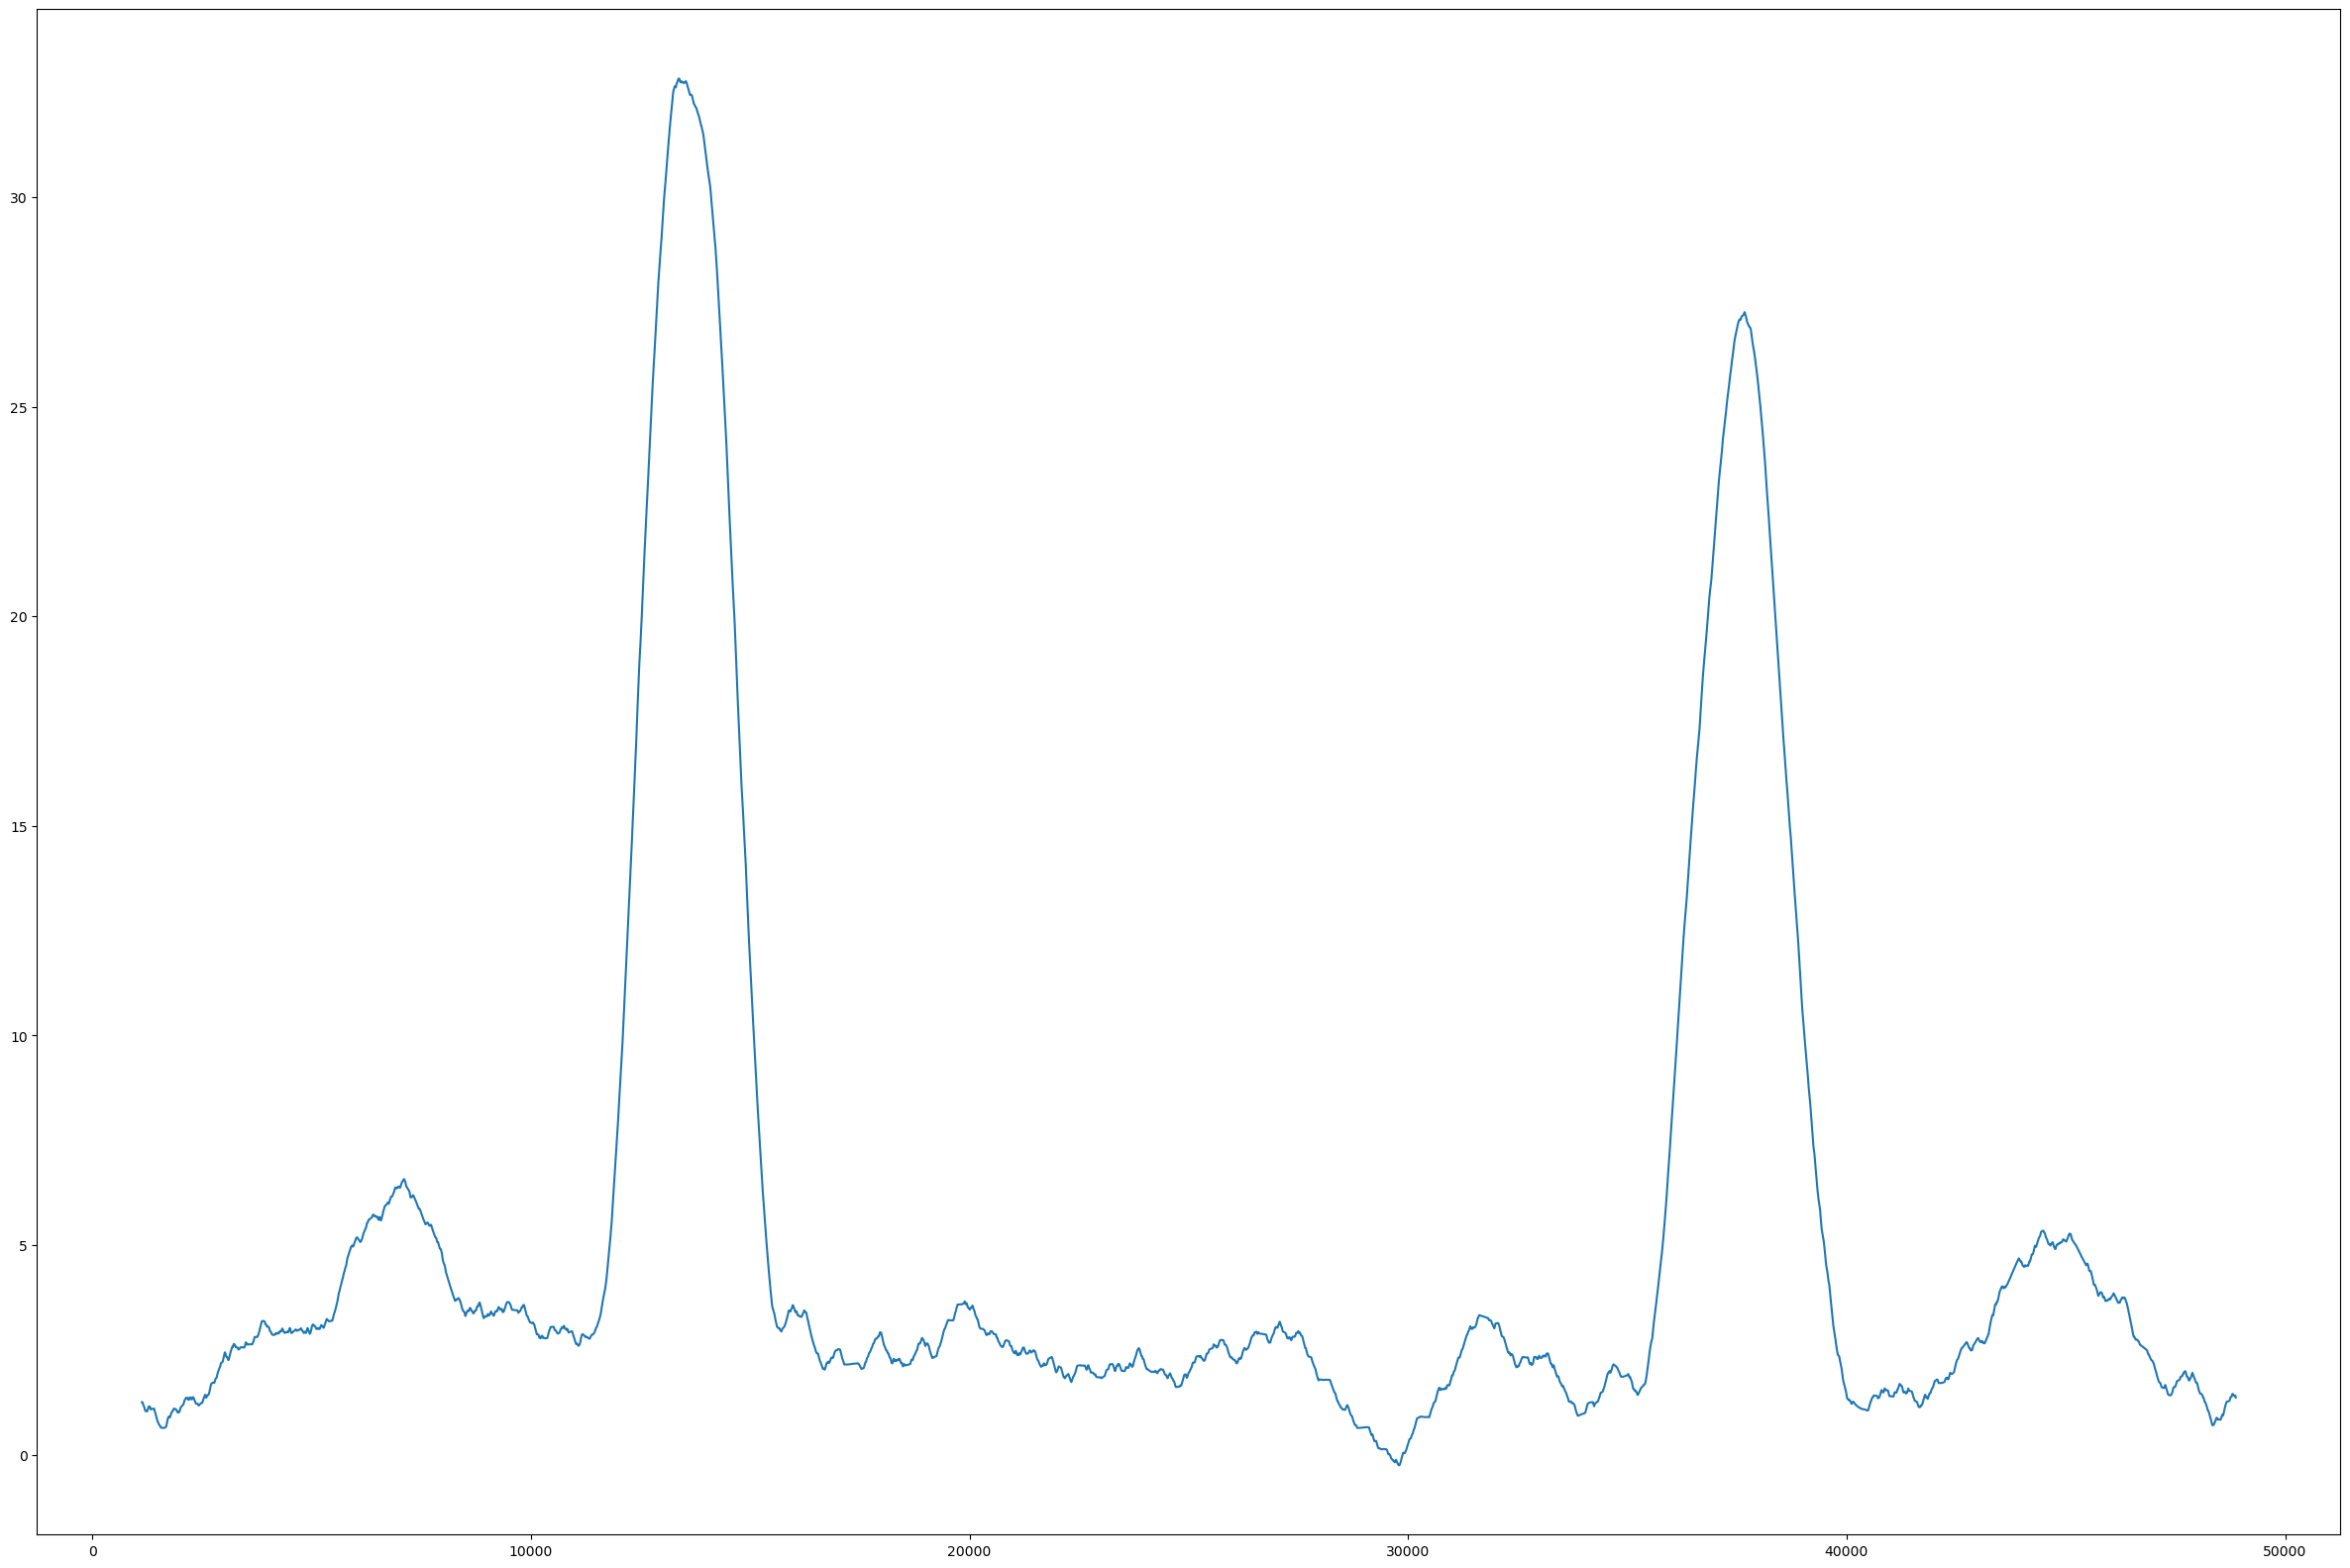

In [31]:
import numpy as np

def remove_constant_noise(data, window_size):
    """
    Removes constant noise from data using a moving average filter.
    
    Parameters:
        data (array-like): The input data.
        window_size (int): Size of the moving average window.
        
    Returns:
        array: Data with constant noise removed.
    """
    # Apply a moving average filter
    filtered_data = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    
    return filtered_data

# Example usage
filtered_data = remove_constant_noise(w2, 45000)
filtered_time = remove_constant_noise(t2, 45000)
plt.plot(filtered_time, filtered_data)

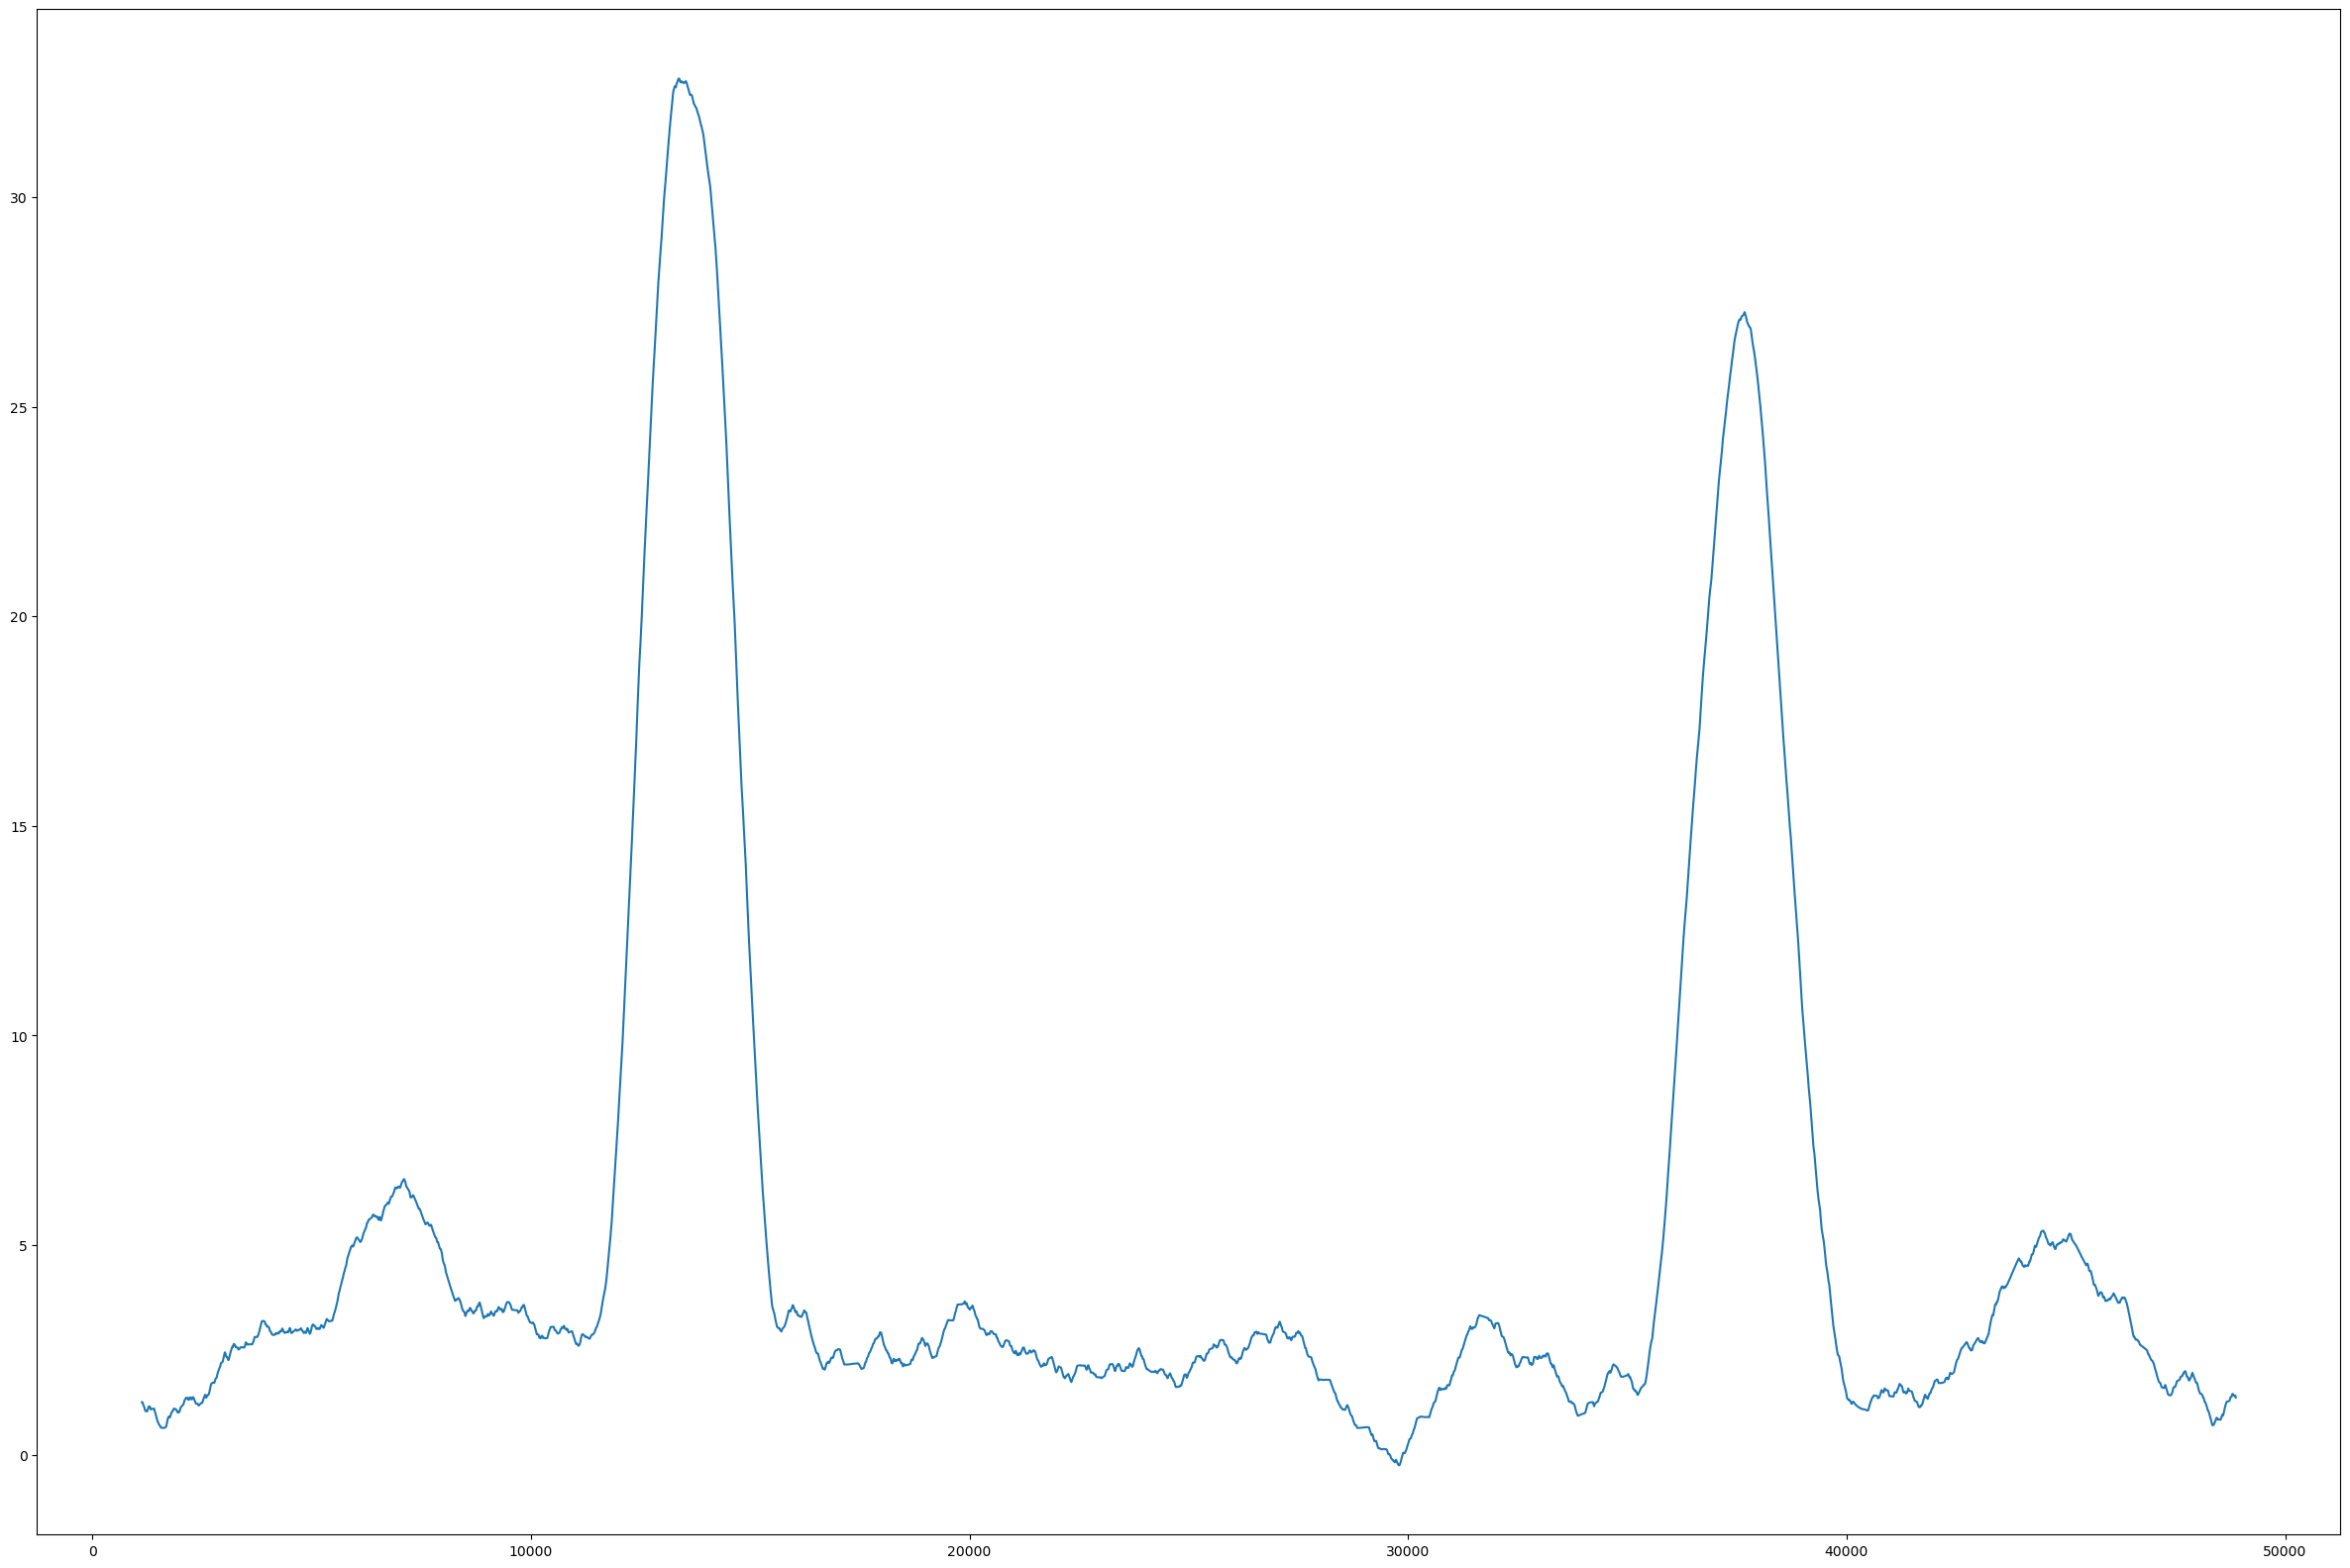

In [32]:
import numpy as np

def remove_constant_noise(data, window_size):
    """
    Removes constant noise from data using a moving average filter.
    
    Parameters:
        data (array-like): The input data.
        window_size (int): Size of the moving average window.
        
    Returns:
        array: Data with constant noise removed.
    """
    # Apply a moving average filter
    filtered_data = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    
    return filtered_data

# Example usage
filtered_data = remove_constant_noise(w2, 45000)
filtered_time = remove_constant_noise(t2, 45000)
plt.plot(filtered_time, filtered_data)

In [33]:
w2 = filtered_data
t2 = filtered_time

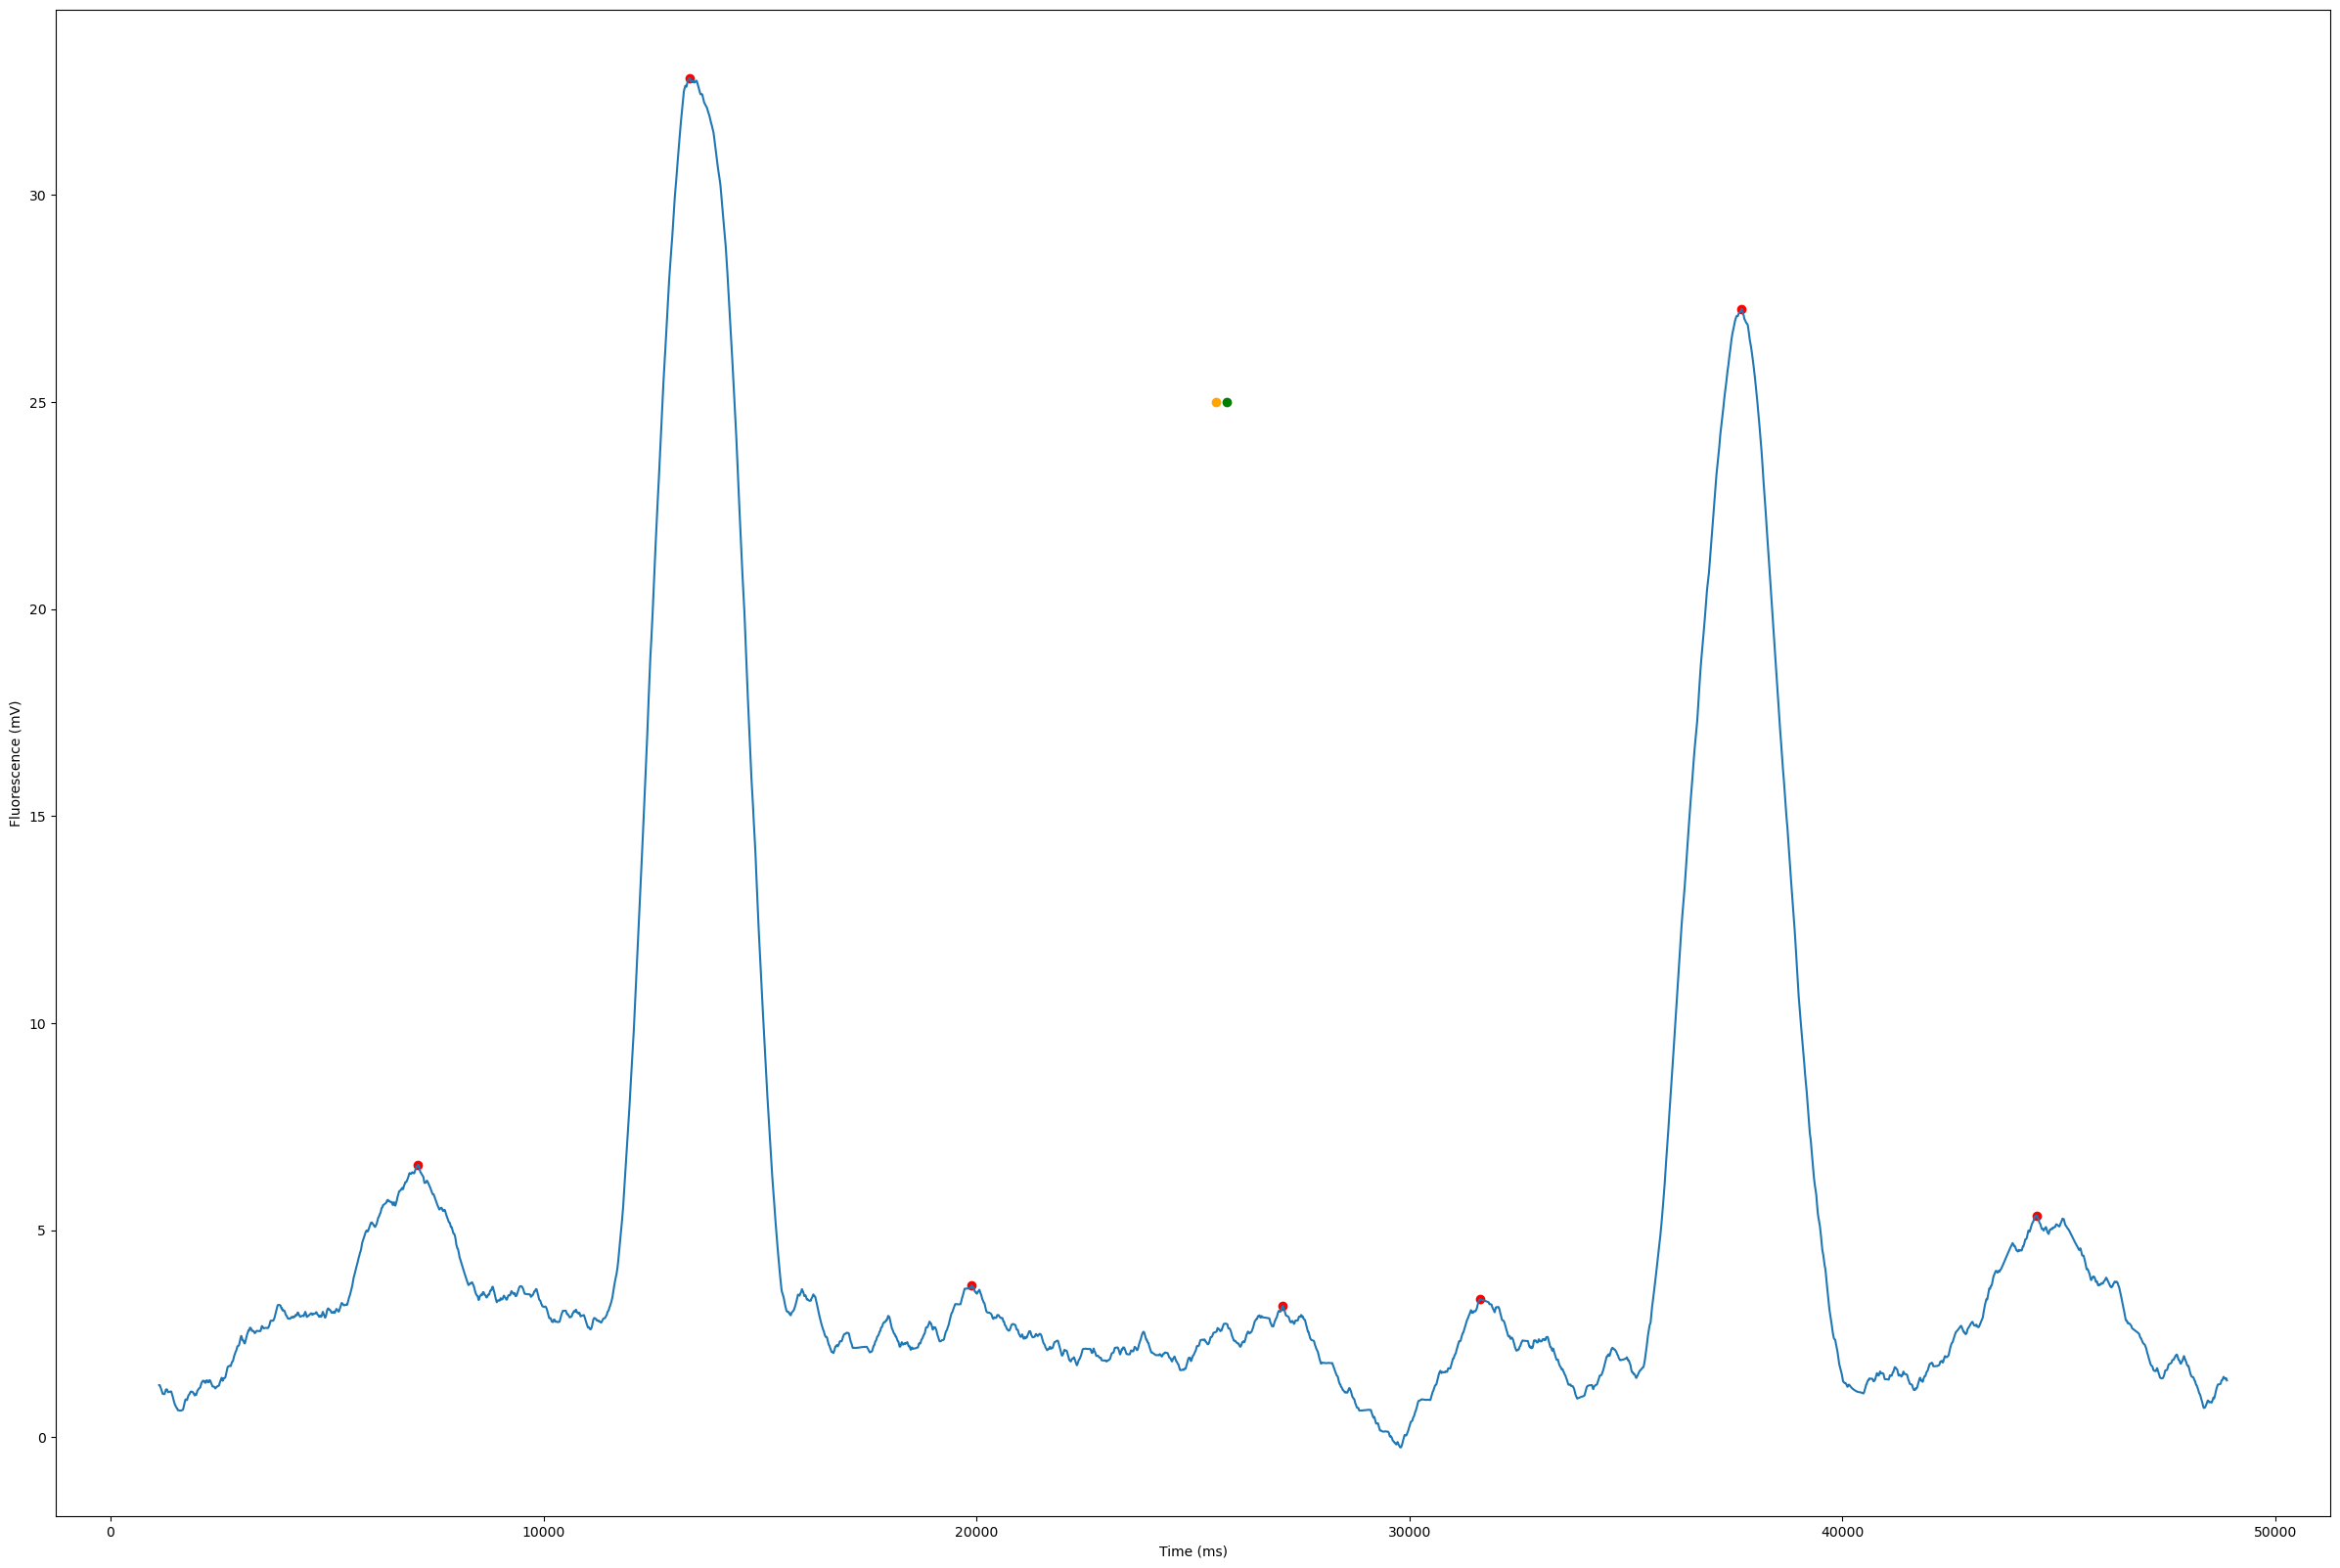

In [34]:
from scipy.signal import find_peaks
maxima_indices2, _ = find_peaks(w2, prominence=1)
plt.plot(t2, w2, label='Original Data')
plt.scatter(t2[maxima_indices2], w2[maxima_indices2], color='red', label='Maxima')
plt.xlabel('Time (ms)')
plt.ylabel('Fluorescence (mV)')

plt.scatter(25789.424348435336,25,color = 'green')
plt.scatter(25520.29935532,25,color = 'orange')

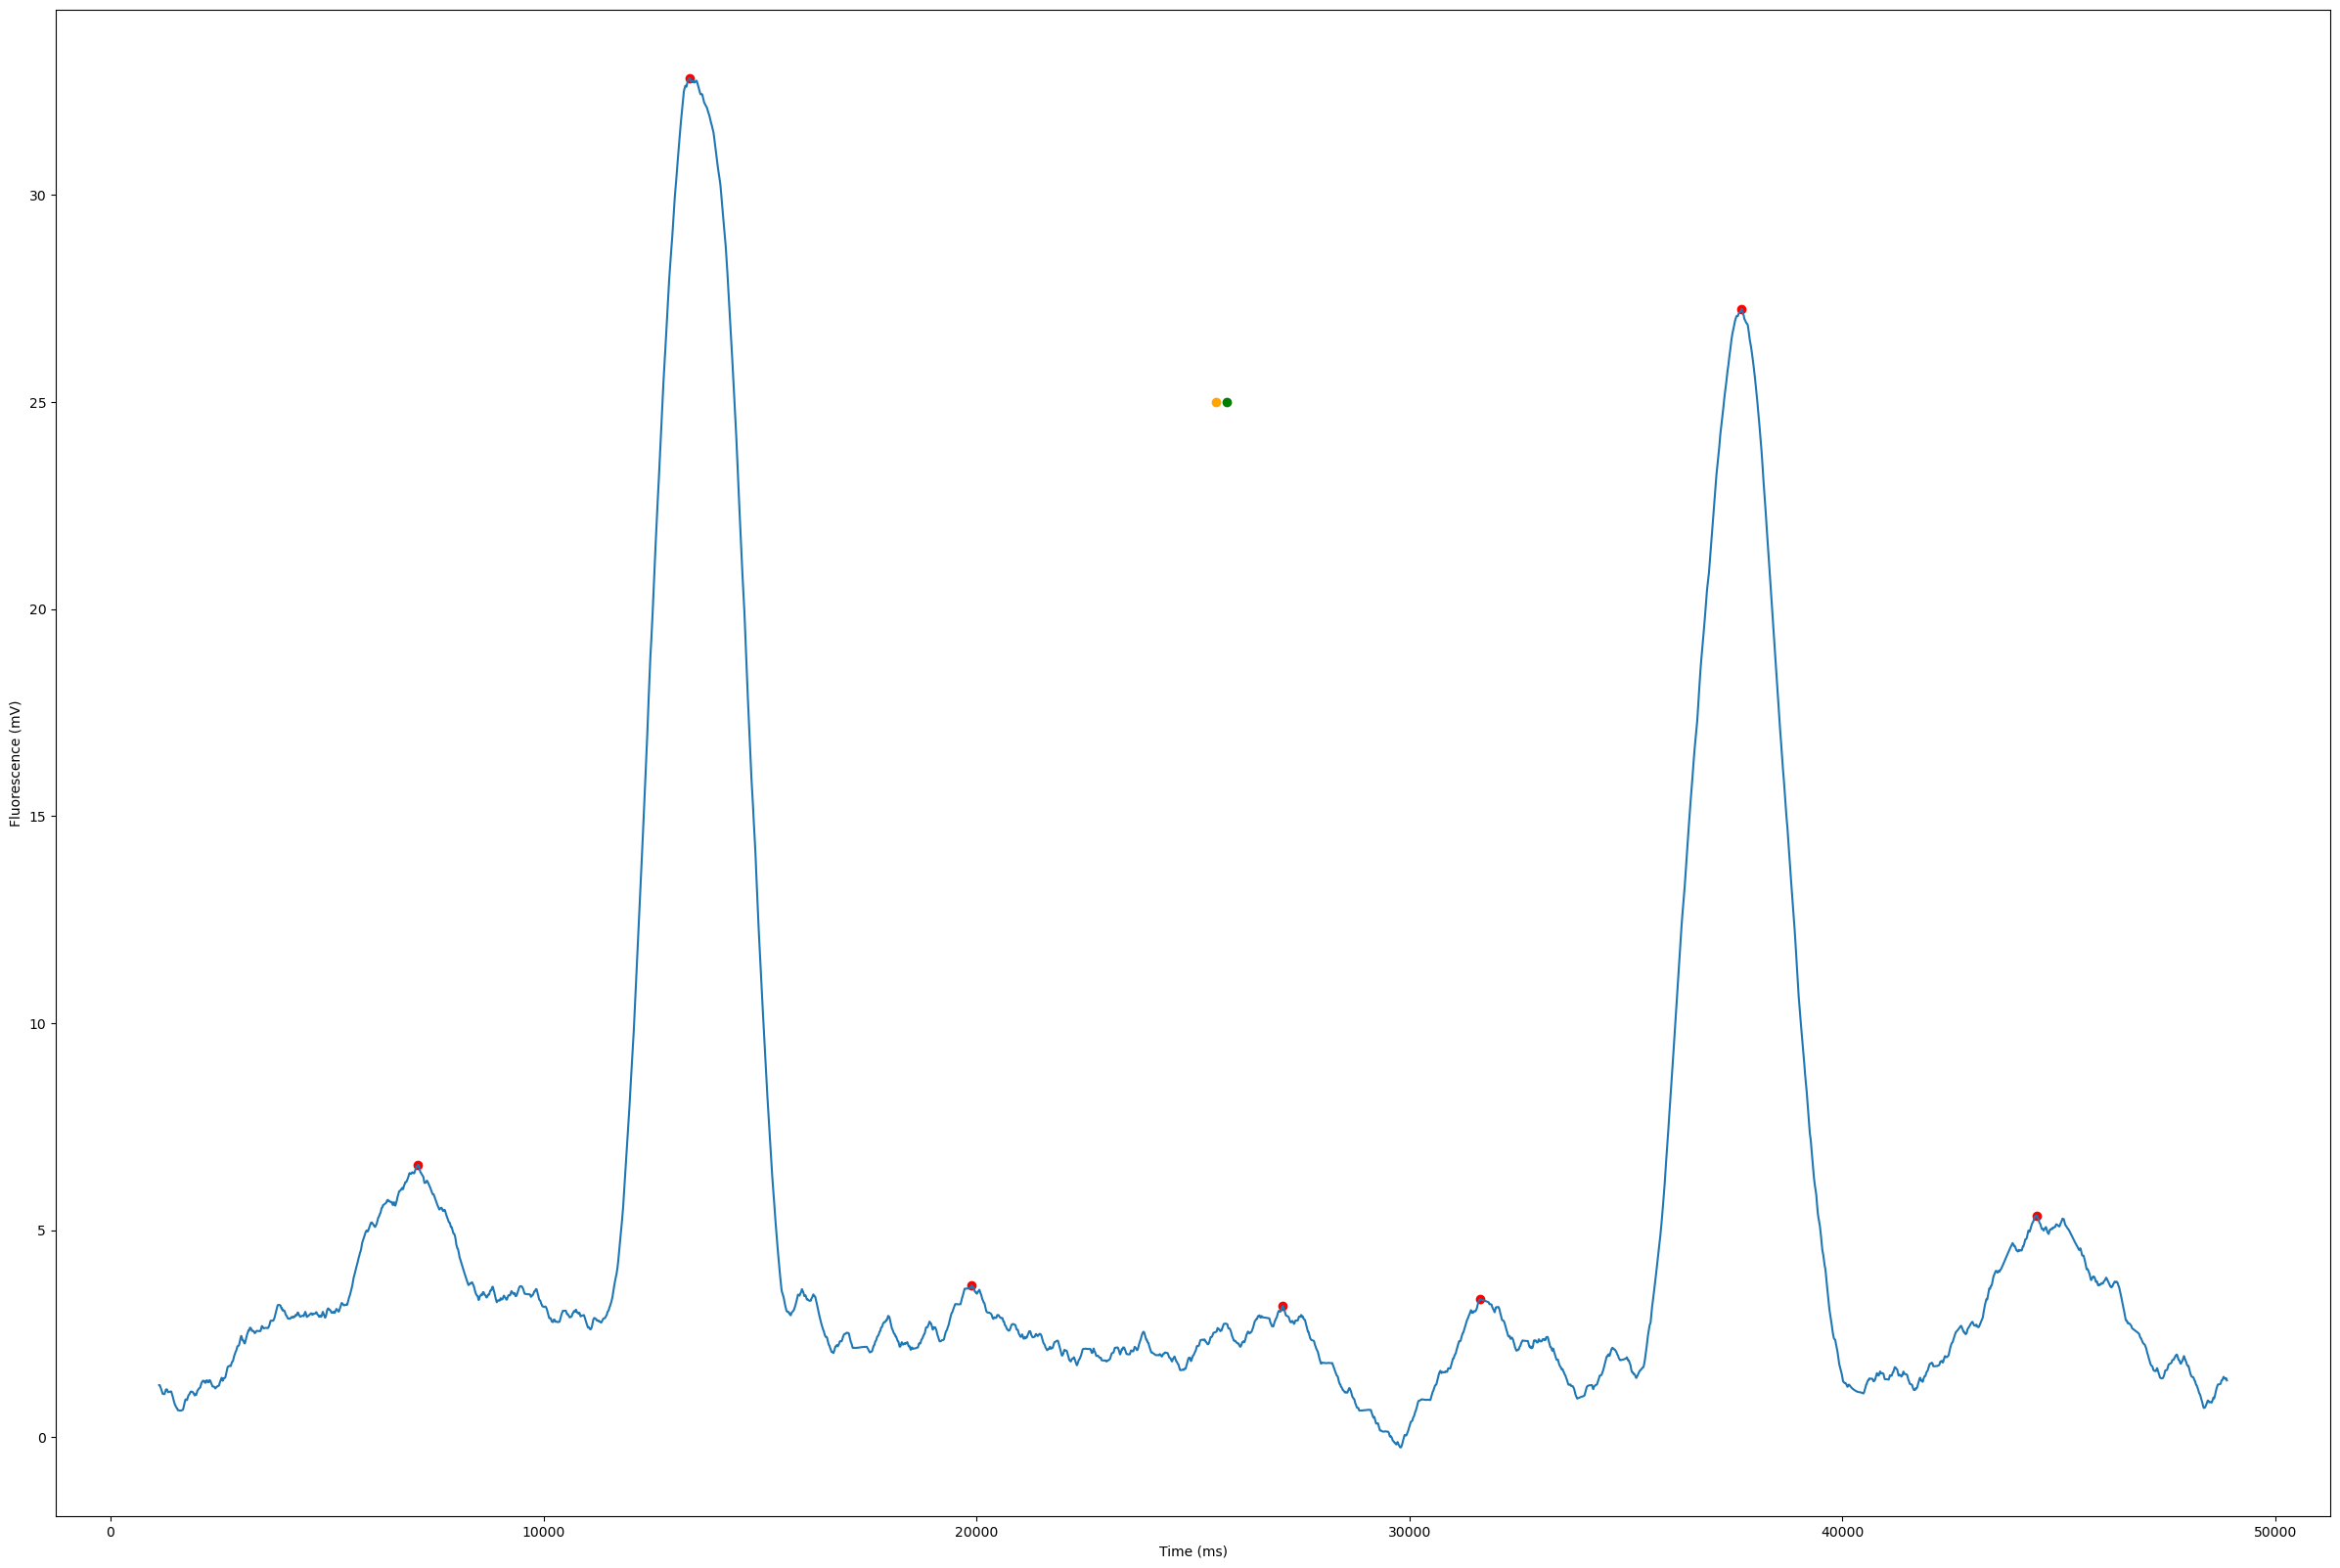

In [35]:
from scipy.signal import find_peaks
maxima_indices2, _ = find_peaks(w2, prominence=1)
plt.plot(t2, w2, label='Original Data')
plt.scatter(t2[maxima_indices2], w2[maxima_indices2], color='red', label='Maxima')
plt.xlabel('Time (ms)')
plt.ylabel('Fluorescence (mV)')

plt.scatter(25789.424348435336,25,color = 'green')
plt.scatter(25520.29935532,25,color = 'orange')

In [36]:
I = w2[maxima_indices2]
for i in range(np.size(I)):
    if I[i]>5:
        print ('intensity: '+str(I[i])+' index: '+str(i))

intensity: 6.577835726152982 index: 0
intensity: 32.82816173128545 index: 1
intensity: 27.254254514538637 index: 5
intensity: 5.345947633524268 index: 6


In [37]:
I = w2[maxima_indices2]
for i in range(np.size(I)):
    if I[i]>5:
        print ('intensity: '+str(I[i])+' index: '+str(i))

intensity: 6.577835726152982 index: 0
intensity: 32.82816173128545 index: 1
intensity: 27.254254514538637 index: 5
intensity: 5.345947633524268 index: 6


In [38]:
print(32.828161731245864/27.2542545145057)
print(6.577835726145002/5.3459476335177945)



print(6.577835726145002/32.828161731245864   ,  5.3459476335177945/27.2542545145057  )

1.2045151230892603
1.2304339991853956
0.20037173509731476 0.19615093968805816


In [39]:
print(32.828161731245864/27.2542545145057)
print(6.577835726145002/5.3459476335177945)



print(6.577835726145002/32.828161731245864   ,  5.3459476335177945/27.2542545145057  )

1.2045151230892603
1.2304339991853956
0.20037173509731476 0.19615093968805816


In [40]:
#T2 = t2[maxima_indices2]


#mid = T2[0] + ( (T2[6] - T2[0])/2)
#print('midpoint: ' + str(mid) + ' ms')

In [41]:
T2 = t2[maxima_indices2]


mid = T2[1] + ( (T2[5] - T2[1])/2)
print('midpoint: ' + str(mid) + ' ms')

midpoint: 25520.29935532 ms


In [42]:
T2 = t2[maxima_indices2]


mid = T2[1] + ( (T2[5] - T2[1])/2)
print('midpoint: ' + str(mid) + ' ms')

midpoint: 25520.29935532 ms


In [43]:
t1 = df1.get("Time  [ms]")
t1 = t1[::2]
t1 = t1.to_numpy()

offset= mid-T1 
t1 = t1+offset

#offset= 25950-T1 
#t1 = t1+offset

In [50]:
f_interpolated = np.interp(t2, t1, freq)
f_interpolated

array([650503.89440333, 650503.89440333, 650503.89440333, ...,
       650503.88755739, 650503.88755605, 650503.88755472])

In [51]:
freq

array([650503.89440333, 650503.89779091, 650503.90103735, 650503.90583643,
       650503.91035321, 650503.91444654, 650503.91839873, 650503.92263321,
       650503.9257385 , 650503.92983183, 650503.93378402, 650503.93703045,
       650503.94112379, 650503.94549942, 650503.94888701, 650503.95213344,
       650503.95636793, 650503.95961437, 650503.9642723 , 650503.96751873,
       650503.97161207, 650503.9757054 , 650503.97866954, 650503.98233943,
       650503.98544472, 650503.9896792 , 650503.99363138, 650503.99673667,
       650504.00111231, 650504.00492334, 650504.00873438, 650504.01268656,
       650504.01663875, 650504.01946174, 650504.02214358, 650504.02680151,
       650504.03089484, 650504.03414128, 650504.03696427, 650504.0421868 ,
       650504.04543324, 650504.04825623, 650504.05531371, 650504.05926589,
       650504.06392382, 650504.06717026, 650504.07084015, 650504.07507463,
       650504.07803877, 650504.08227326, 650504.085802  , 650504.09017763,
       650504.09342407, 6

In [52]:
f_interpolated

array([650503.89440333, 650503.89440333, 650503.89440333, ...,
       650503.88755739, 650503.88755605, 650503.88755472])

In [58]:
np.shape(f_interpolated)

(955004,)

In [59]:
np.shape(w2)

(955004,)

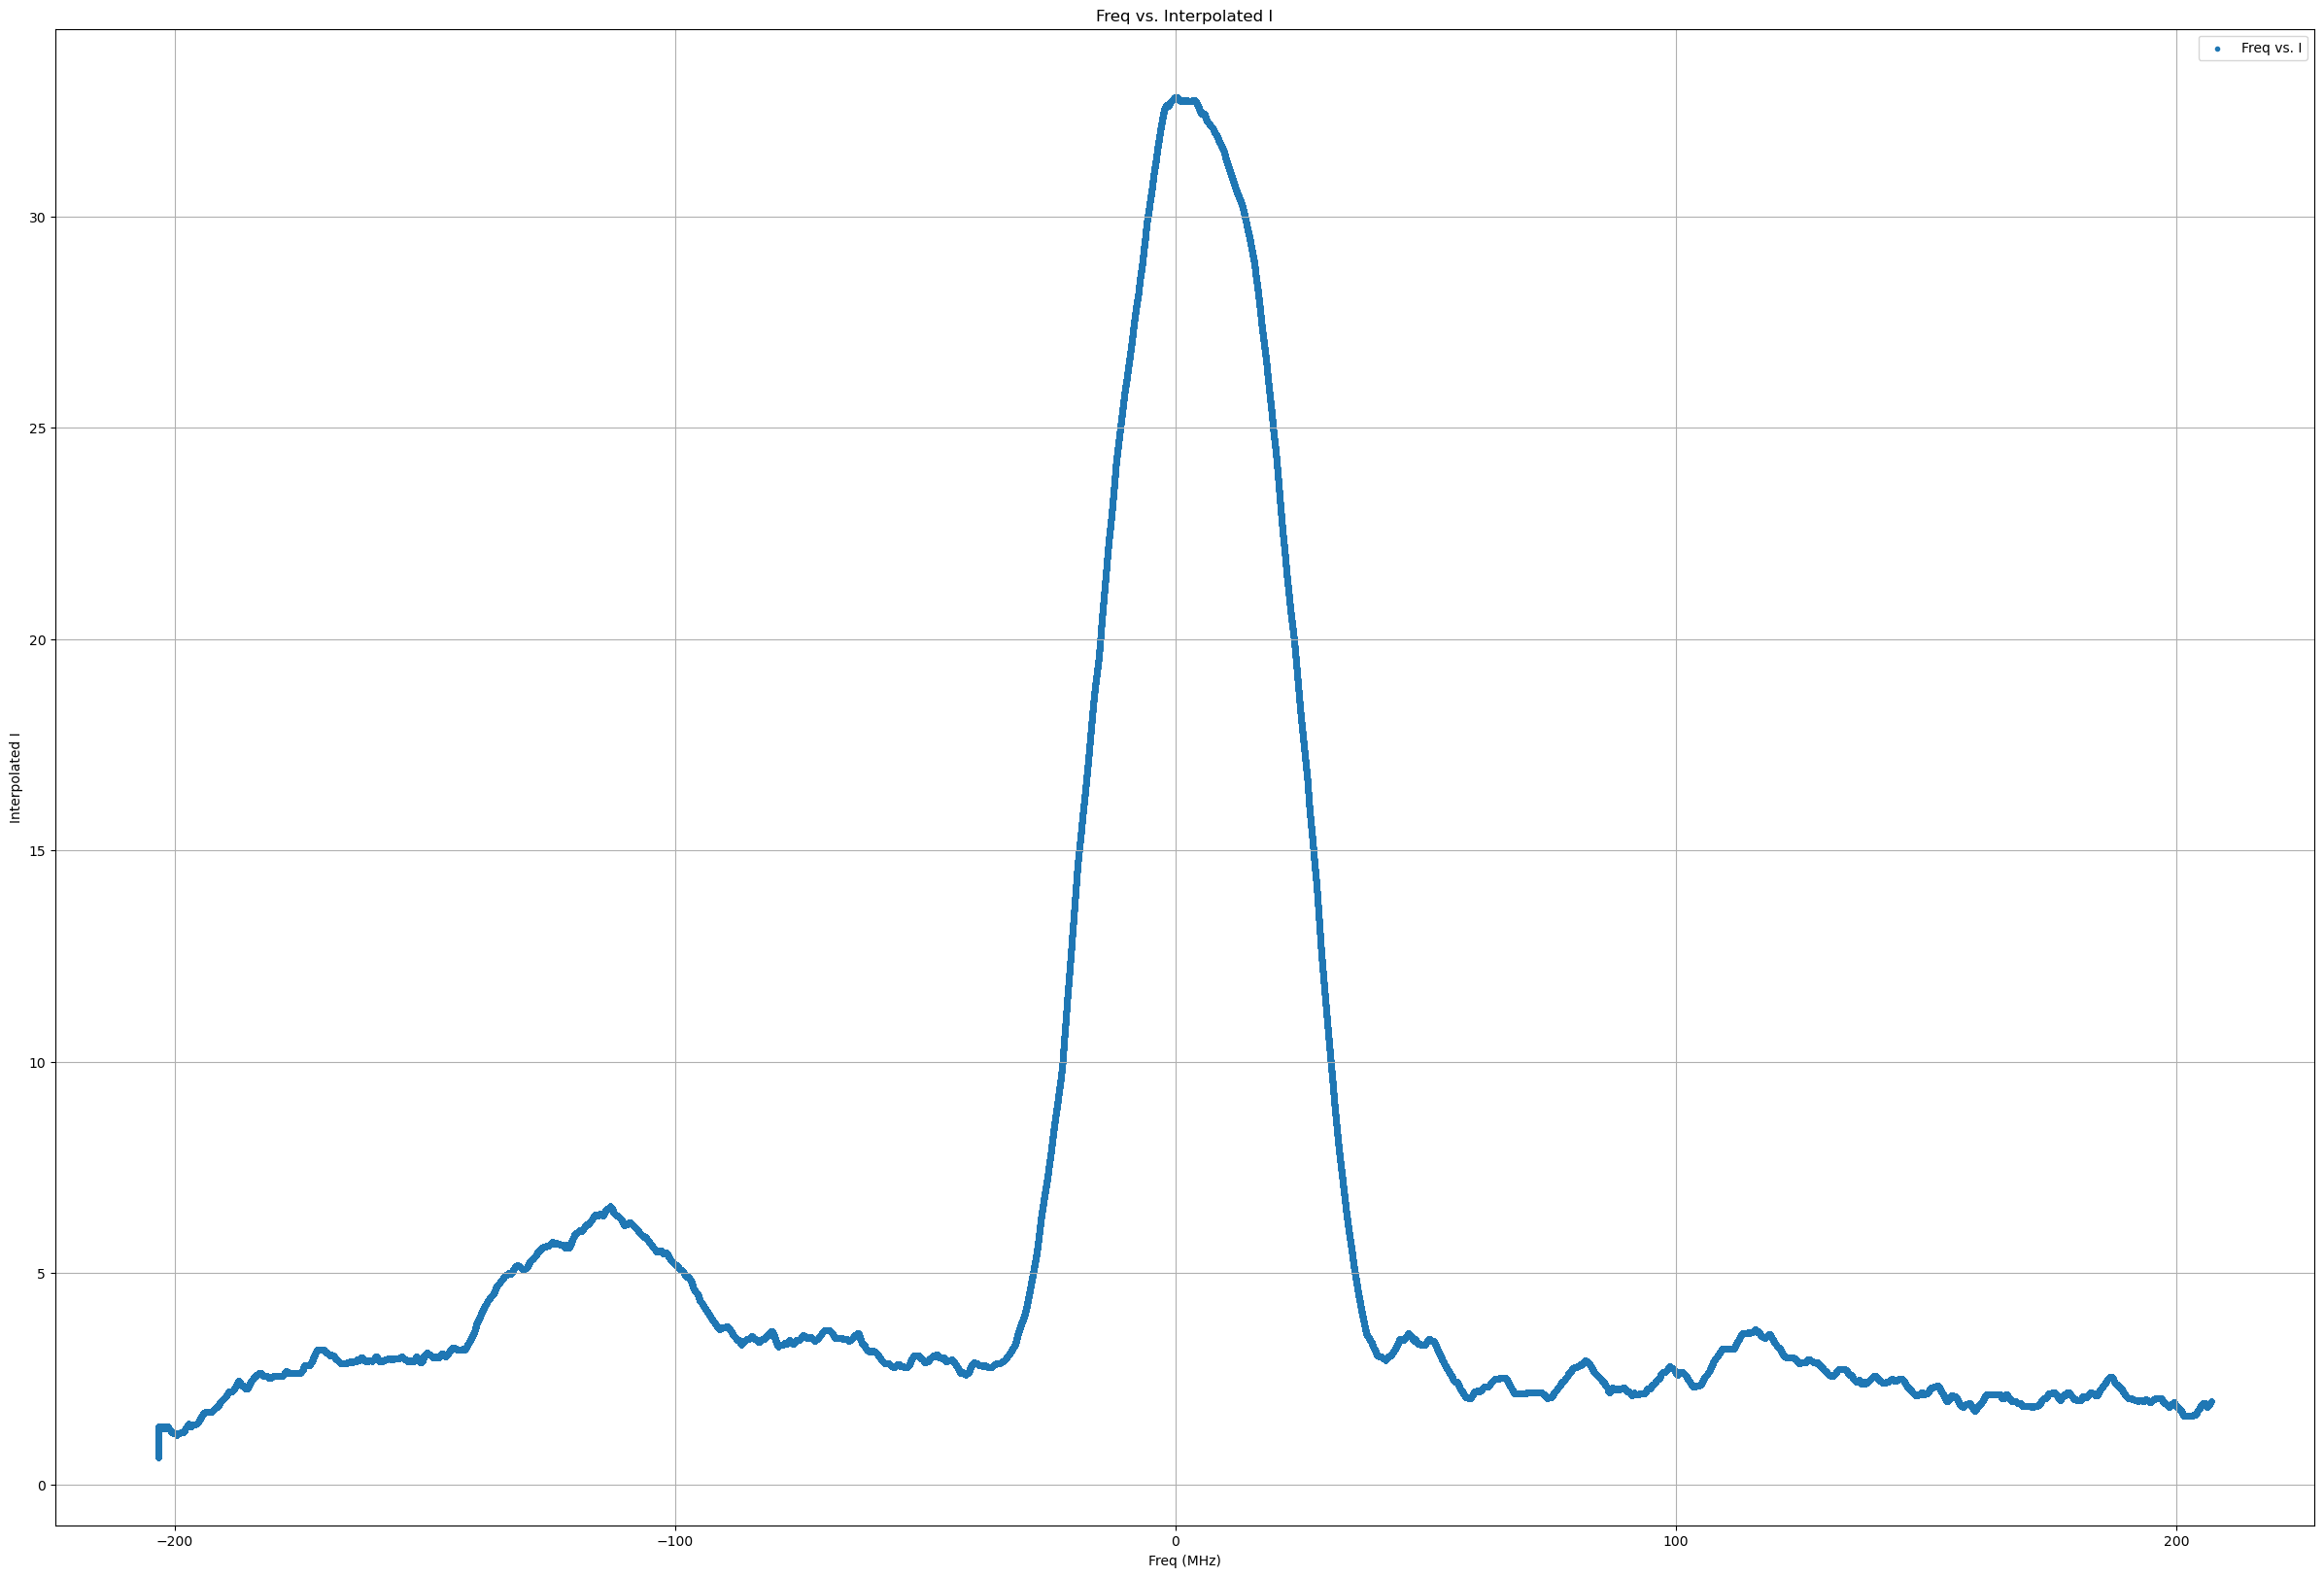

In [44]:
f_interpolated = np.interp(t2, t1, freq)

f_interpolated = f_interpolated-650504.097689418





plt.scatter(f_interpolated[:477502]*1000, w2[:477502], marker='.', label='Freq vs. I')


#plt.plot(650504.097689418,32.828161731245864,'o', color = 'orange')

#bounds
#plt.plot(650504.105,32.828161731245864,'o', color = 'orange')
#plt.plot(650504.095,32.828161731245864,'o', color = 'orange')


plt.ylabel('Interpolated I')
plt.xlabel('Freq (MHz)')
plt.title('Freq vs. Interpolated I')


plt.grid(which = 'both')
plt.legend()
plt.show()

In [61]:
t2

array([ 1125.02497167,  1125.07497167,  1125.12497166, ...,
       48875.07376527, 48875.12376527, 48875.17376527])

In [62]:
t1

array([ 2189.82425532,  2395.49245532,  2601.24515532,  2806.95255532,
        3012.64795532,  3218.49015532,  3423.98495532,  3629.71855532,
        3835.45495532,  4041.16635532,  4246.92835532,  4452.65815532,
        4658.40655532,  4873.24375532,  5078.79785532,  5284.55305532,
        5499.39155532,  5705.03325532,  5910.71855532,  6116.46625532,
        6322.24855532,  6527.92275532,  6733.59205532,  6948.40785532,
        7154.15785532,  7359.79845532,  7565.55205532,  7771.22205532,
        7976.93885532,  8182.61955532,  8388.32805532,  8594.10485532,
        8799.78605532,  9005.49985532,  9211.23955532,  9416.98805532,
        9622.72105532,  9828.34015532, 10034.10555532, 10239.89315532,
       10445.52905532, 10651.29725532, 11062.67645532, 11268.42545532,
       11474.07575532, 11679.83185532, 11885.55005532, 12091.80245532,
       12297.05025532, 12502.69175532, 12708.48505532, 12914.13755532,
       13119.83775532, 13325.54925532, 13531.26125532, 13737.10895532,
      

In [63]:
freq

array([650503.89440333, 650503.89779091, 650503.90103735, 650503.90583643,
       650503.91035321, 650503.91444654, 650503.91839873, 650503.92263321,
       650503.9257385 , 650503.92983183, 650503.93378402, 650503.93703045,
       650503.94112379, 650503.94549942, 650503.94888701, 650503.95213344,
       650503.95636793, 650503.95961437, 650503.9642723 , 650503.96751873,
       650503.97161207, 650503.9757054 , 650503.97866954, 650503.98233943,
       650503.98544472, 650503.9896792 , 650503.99363138, 650503.99673667,
       650504.00111231, 650504.00492334, 650504.00873438, 650504.01268656,
       650504.01663875, 650504.01946174, 650504.02214358, 650504.02680151,
       650504.03089484, 650504.03414128, 650504.03696427, 650504.0421868 ,
       650504.04543324, 650504.04825623, 650504.05531371, 650504.05926589,
       650504.06392382, 650504.06717026, 650504.07084015, 650504.07507463,
       650504.07803877, 650504.08227326, 650504.085802  , 650504.09017763,
       650504.09342407, 6

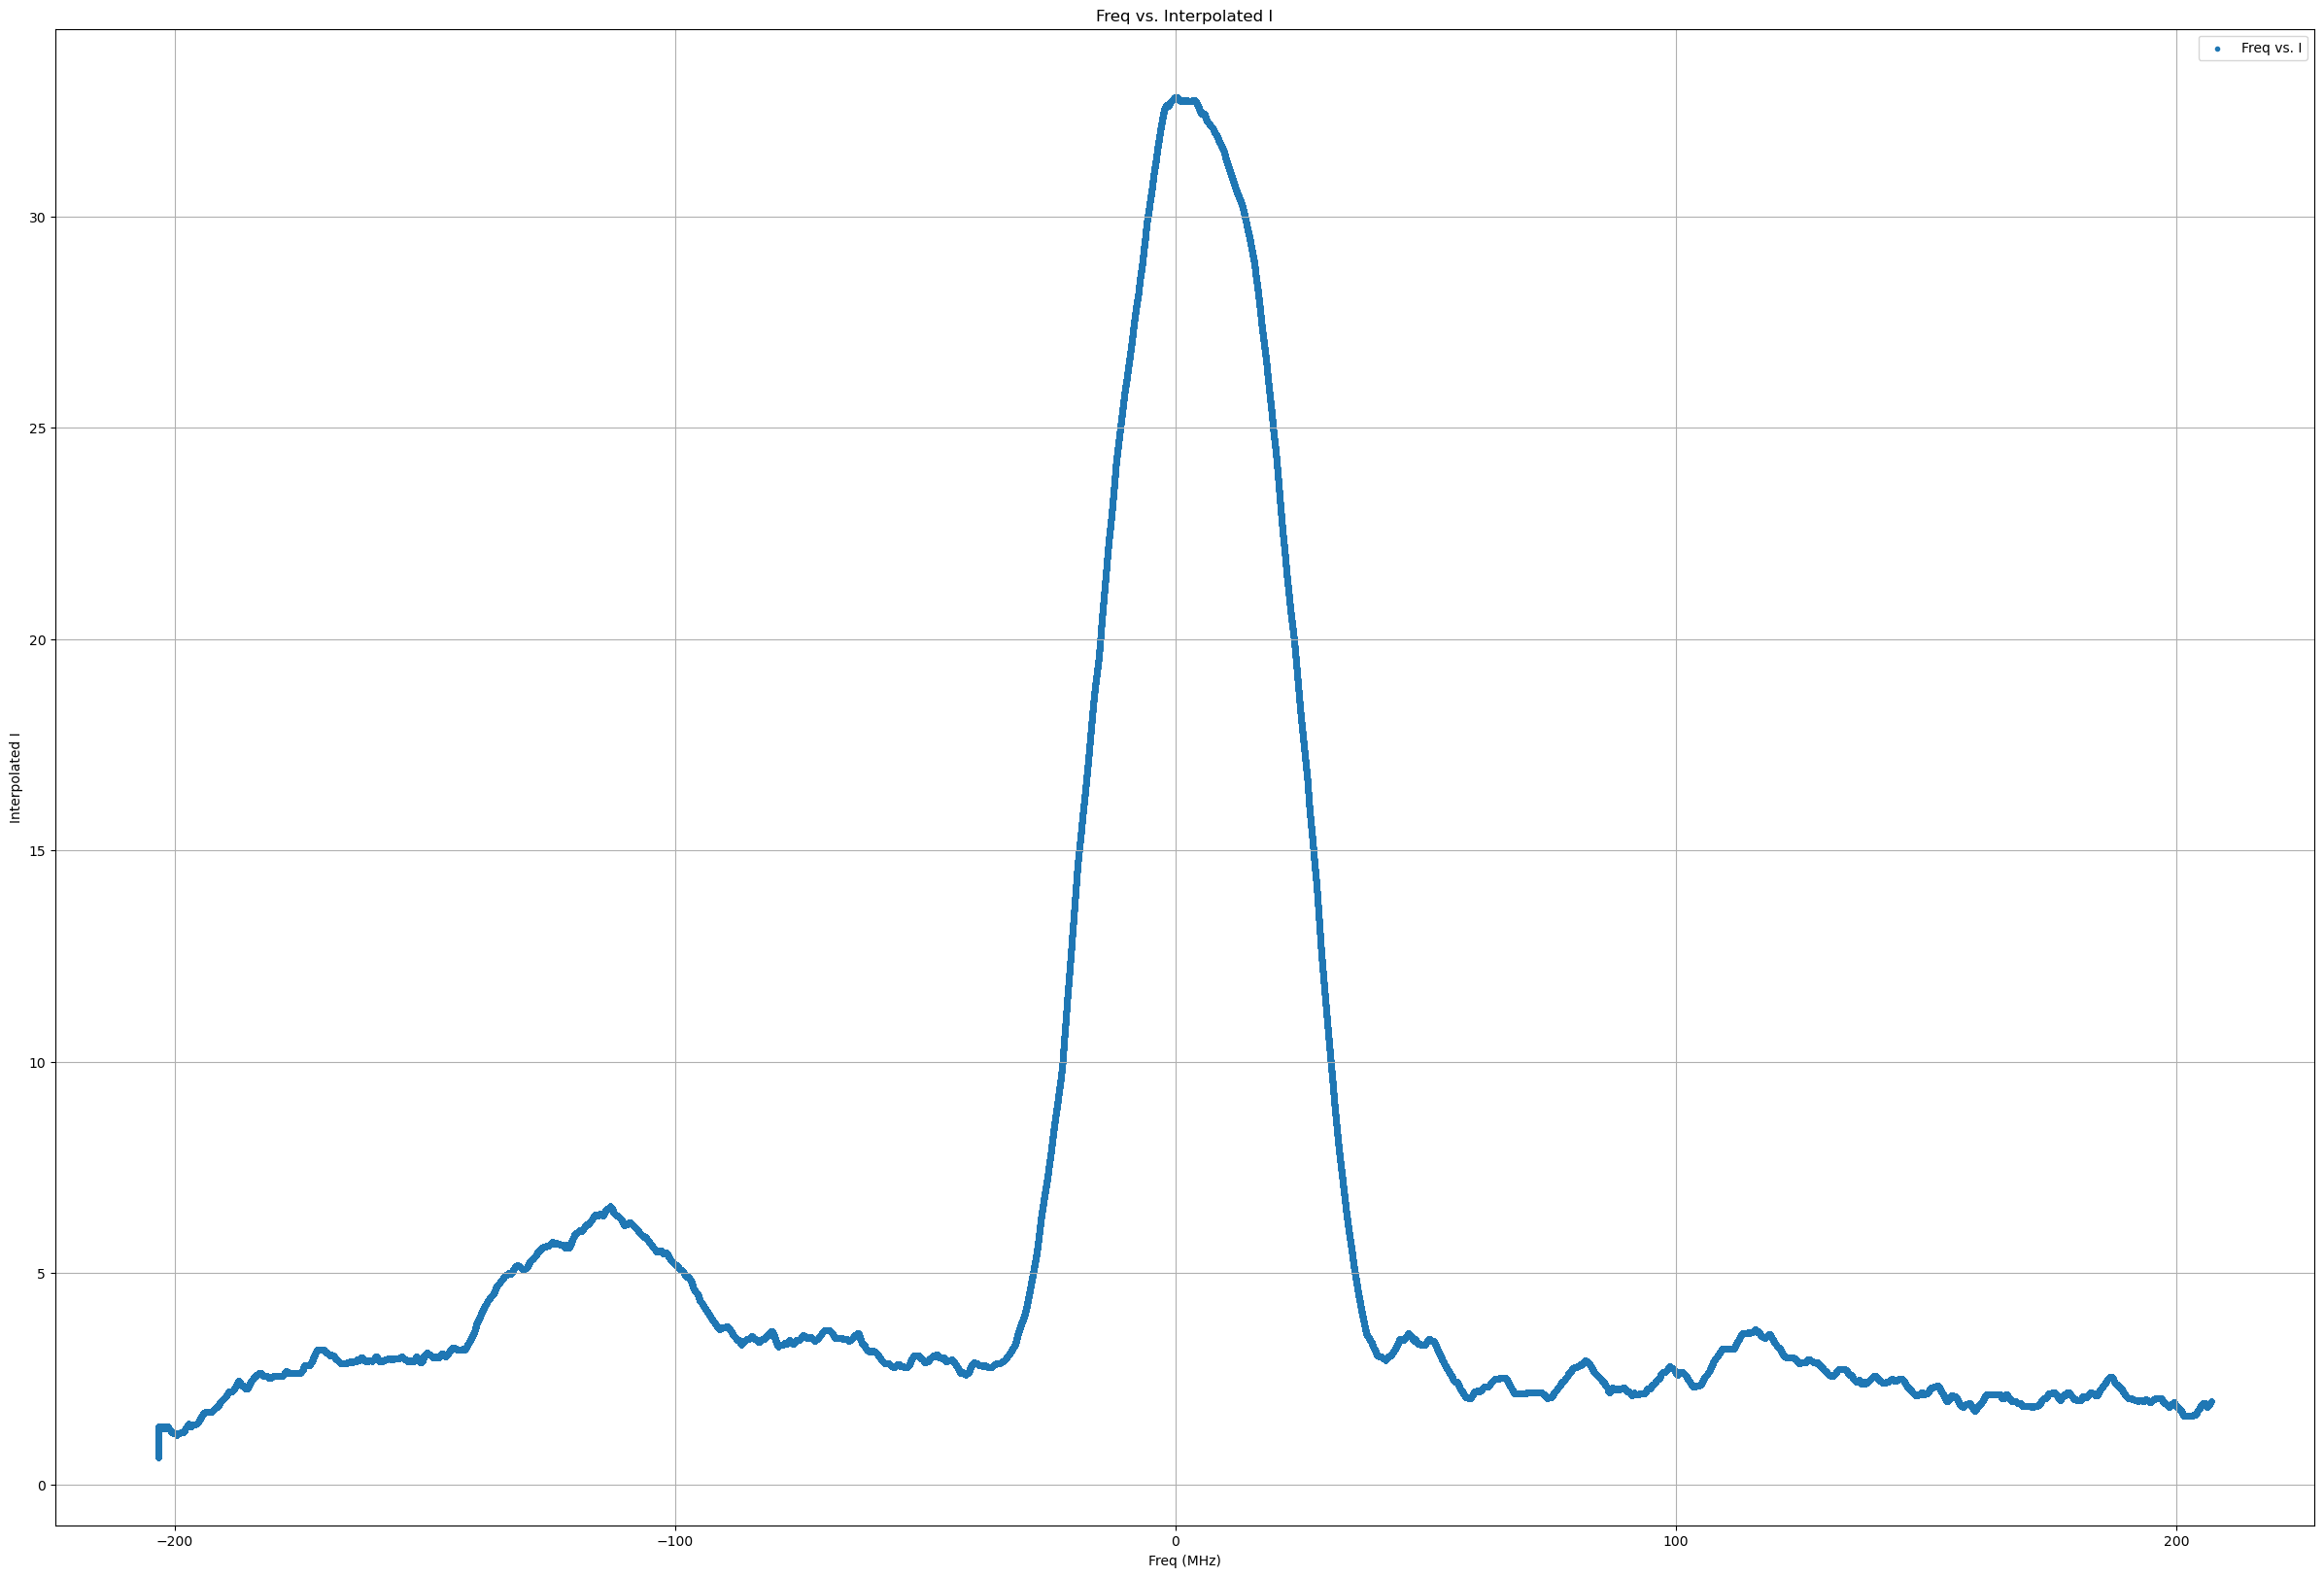

In [45]:
f_interpolated = np.interp(t2, t1, freq)

f_interpolated = f_interpolated-650504.097689418





plt.scatter(f_interpolated[:477502]*1000, w2[:477502], marker='.', label='Freq vs. I')


#plt.plot(650504.097689418,32.828161731245864,'o', color = 'orange')

#bounds
#plt.plot(650504.105,32.828161731245864,'o', color = 'orange')
#plt.plot(650504.095,32.828161731245864,'o', color = 'orange')


plt.ylabel('Interpolated I')
plt.xlabel('Freq (MHz)')
plt.title('Freq vs. Interpolated I')


plt.grid(which = 'both')
plt.legend()
plt.show()

In [46]:

print(np.max(w2), np.argmax(w2))
res = f_interpolated[np.argmax(w2)]

print(res)

32.82816173128545 244884
0.0


In [47]:

print(np.max(w2), np.argmax(w2))
res = f_interpolated[np.argmax(w2)]

print(res)

32.82816173128545 244884
0.0


In [48]:
(650504.097689418-650504.0855669753)*1000

12.122442713007331

In [60]:
## On your .ipynb, import this plotting_style by adding in and uncommenting the following lines:
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style_arial import set_plotting_style_arial
set_plotting_style_arial()

Initialising arial plotting style...
Success! Arial plotting style initialised.


Text(0.5, 0, 'Frequency Detuning* ($\\Delta / \\Gamma$)')

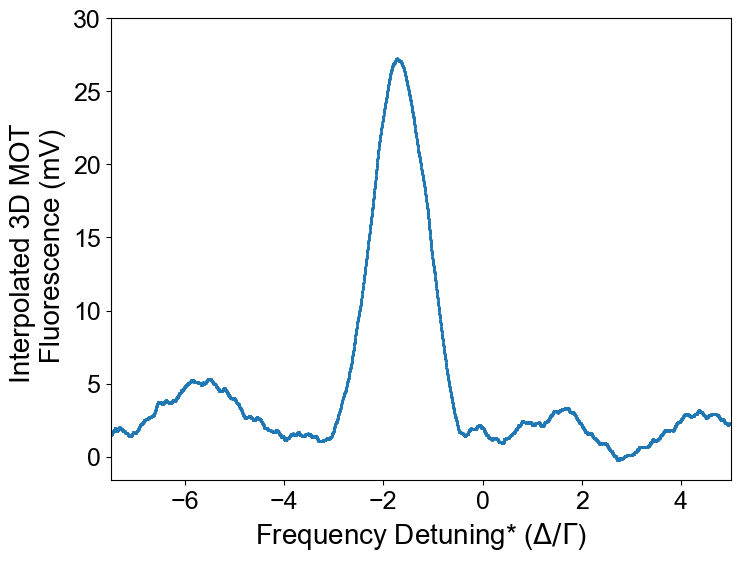

In [ ]:
f_interpolated_ECDL = np.interp(t2, t1, freq)
freq_3DMOT = f_interpolated_ECDL - 0.275 #-275MHz 3D MOT beams with respect to ECDL, where IJD3 is -400MHz wrt ECDL but has a +125MHz AOM
resonance = 650503.8660
detuning_3DMOT = (freq_3DMOT - resonance) * 1000 # MHz

plt.figure(figsize=(8, 6))
plt.scatter([i/32 for i in detuning_3DMOT[477502:955005]][::100], w2[477502:955005][::100], s=5, marker='.')

# #max peak point
# plt.plot(650504.0855669753,27.2542545145057,'o',markersize=100, color = 'orange')

plt.xticks(np.arange(-6, 10, 2))
plt.yticks(np.arange(0, 35, 5))
plt.xlim(-7.5, 5)

plt.ylabel('Interpolated 3D MOT \n Fluorescence (mV)')
plt.xlabel(r'Frequency Detuning* ($\Delta / \Gamma$)')
# plt.title('Freq vs. Interpolated I')


# plt.grid()
# plt.legend()
# plt.show()

# plt.savefig('Frequency_Scan_Blue_MOT.png', dpi=300, bbox_inches='tight')
# plt.savefig('Frequency_Scan_Blue_MOT.pdf', dpi=300, bbox_inches='tight')


In [80]:
P_v = 30*10**(-3) # V #Photodiode signal
P_r = 680*10**(3) # ohm
Respons = 0.15
c = 299792458 #m/s
h = 6.62607015*10**(-34)# Joule*second
wavelength = 460.862022*10**(-9)
f = c/wavelength# m/s
gamma = 2*np.pi*30.41*10**(6) #The natural linewidth of the transition
I_Isat = 0.9
detune = -60 *10**(6) #Hz detuning of the 3D MOT beam

P_I = P_v/P_r
P_P = P_I/Respons
E = h*f 
r_p=P_P/E
R = gamma/2*I_Isat/(1+I_Isat+4*detune**2/gamma**2)
N_pd = r_p/R 

r_sqre = (12.7*10**(-3)/2)**2
d = 0.15

A = np.pi*r_sqre
Omega = A/d**2


N_r = N_pd*4*np.pi/Omega
N_r

40642118.36951197

In [81]:
def number_of_atoms(detuning_in_Hz, photodiode_voltage_in_V):
    P_v = photodiode_voltage_in_V # V #Photodiode signal
    P_r = 680*10**(3) # ohm
    Respons = 0.15
    c = 299792458 #m/s
    h = 6.62607015*10**(-34)# Joule*second
    wavelength = 460.862022*10**(-9)
    f = c/wavelength# m/s
    gamma = 2*np.pi*30.41*10**(6) #The natural linewidth of the transition
    I_Isat = 0.9
    detune = detuning_in_Hz #Hz detuning of the 3D MOT beam


    P_I = P_v/P_r
    P_P = P_I/Respons
    E = h*f 
    r_p=P_P/E
    R = gamma/2*I_Isat/(1+I_Isat+4*detune**2/gamma**2)
    N_pd = r_p/R 

    r_sqre = (12.7*10**(-3)/2)**2
    d = 0.15

    A = np.pi*r_sqre
    Omega = A/d**2


    N_r = N_pd*4*np.pi/Omega

    return N_r

Text(0.5, 0, 'Frequency Detuning ($\\Delta$)')

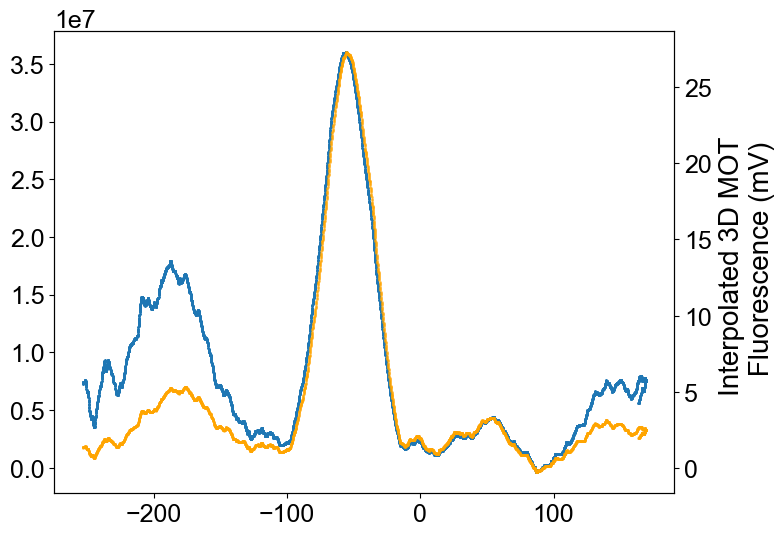

In [104]:
f_interpolated_ECDL = np.interp(t2, t1, freq)
freq_3DMOT = f_interpolated_ECDL - 0.275 #-275MHz 3D MOT beams with respect to ECDL, where IJD3 is -400MHz wrt ECDL but has a +125MHz AOM
resonance = 650503.8660
detuning_3DMOT = (freq_3DMOT - resonance) * 1000 # MHz

detuning_3DMOT_sliced = detuning_3DMOT[477502:955005]
w2_sliced = w2[477502:955005]

fig, ax = plt.subplots(figsize=(8, 6))

# obtain number of atoms using function above by passing in the detuning and voltage for each point here
number_of_atoms_list = [number_of_atoms(detuning, voltage) for detuning, voltage in zip(detuning_3DMOT_sliced*1e6, w2_sliced*1e-3)] # detuning in Hz, voltage in V
ax.scatter(detuning_3DMOT_sliced[::100], number_of_atoms_list[::100], s=5, marker='.')

ax2 = ax.twinx()
ax2.scatter(detuning_3DMOT_sliced[::100], w2_sliced[::100], s=5, marker='.',alpha=0.5, color='orange')

# plt.xticks(np.arange(-6, 10, 2))
# plt.yticks(np.arange(0, 35, 5))
# plt.xlim(-7.5, 5)
plt.ylabel('Interpolated 3D MOT \n Fluorescence (mV)')
plt.xlabel(r'Frequency Detuning ($\Delta$)')


# 250517 Now plot nice LaTex font for thesis

In [105]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

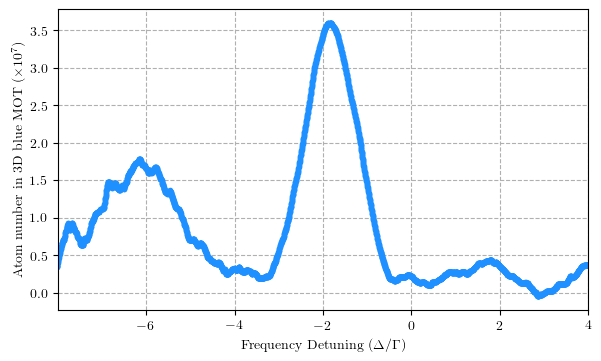

In [126]:
f_interpolated_ECDL = np.interp(t2, t1, freq)
freq_3DMOT = f_interpolated_ECDL - 0.275 #-275MHz 3D MOT beams with respect to ECDL, where IJD3 is -400MHz wrt ECDL but has a +125MHz AOM
resonance = 650503.8660
detuning_3DMOT = (freq_3DMOT - resonance) * 1000 # MHz

detuning_3DMOT_sliced = detuning_3DMOT[477502:955005]
w2_sliced = w2[477502:955005]
# obtain number of atoms using function above by passing in the detuning and voltage for each point here
number_of_atoms_list = [number_of_atoms(detuning, voltage) for detuning, voltage in zip(detuning_3DMOT_sliced*1e6, w2_sliced*1e-3)] # detuning in Hz, voltage in V

detuning_3DMOT_sliced_gamma = detuning_3DMOT_sliced / 30.5 # convert to gamma units

plt.plot(detuning_3DMOT_sliced_gamma[::100], np.array(number_of_atoms_list[::100])/1e7,'.',color='dodgerblue')
# plt.plot(detuning_3DMOT_sliced_gamma[np.argmax(number_of_atoms_list)],number_of_atoms_list[np.argmax(number_of_atoms_list)], 'x', markersize=10, color='crimson')

plt.xticks(np.arange(-6, 10, 2))
# plt.yticks(np.arange(0, 35, 5))
plt.xlim(-8, 4)
plt.ylabel(r'Atom number in 3D blue MOT ($\times$10$^7$)')
plt.xlabel(r'Frequency Detuning ($\Delta/\Gamma$)')

plt.savefig("250517 3DMOTAtomNumberResonanceFrequencySweep.pdf",dpi=300)

In [117]:
detuning_3DMOT_sliced[np.argmax(number_of_atoms_list)]

-55.51250698044896

In [127]:
detuning_3DMOT_sliced_gamma[np.argmax(number_of_atoms_list)]

-1.8200821960802938

In [111]:
np.shape(number_of_atoms_list)

(477502,)

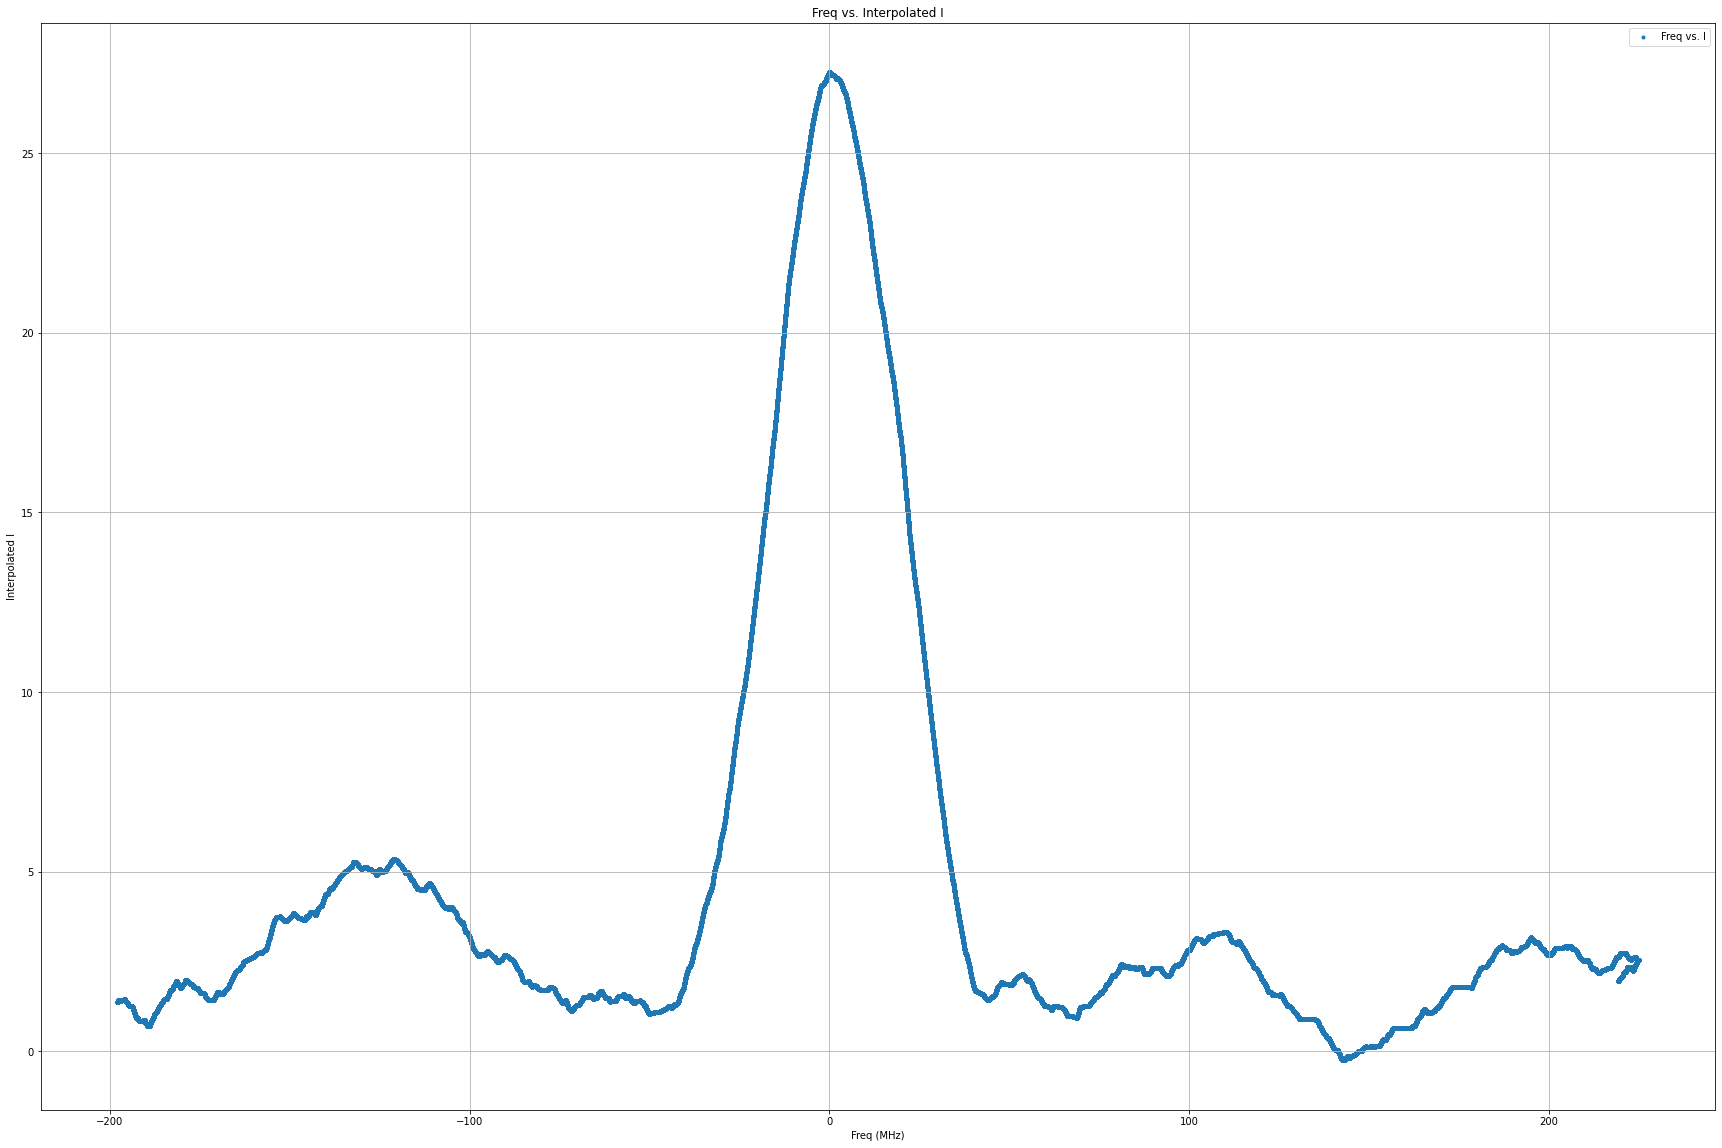

In [ ]:
f_interpolated = np.interp(t2, t1, freq)

f_interpolated = f_interpolated-650504.0855669753

plt.scatter(f_interpolated[477502:955005]*1000, w2[477502:955005], marker='.', label='Freq vs. I')

#max peak point
#plt.plot(650504.0855669753,27.2542545145057,'o', color = 'orange')



plt.ylabel('Interpolated I')
plt.xlabel('Freq (MHz)')
plt.title('Freq vs. Interpolated I')


plt.grid()
plt.legend()
plt.show()


In [ ]:
#use this code to  find max point and freq
#print(np.max(w2[:477502]), np.argmax(w2[:477502]))
#res2 = f_interpolated[np.argmax(w2[:477502])]

#print(res2)


32.828161731245864 244885
650504.097689418


In [ ]:
f_interpolated = np.interp(t2, t1, freq)
for i in range(np.size(w2)):
    if w2[i]==6.577835726145002 or w2[i]==5.3459476335177945:
        print ('intensity: '+str(w2[i])+' index: '+str(i) ,'frequency:' + str(f_interpolated[i]))

intensity: 6.577835726145002 index: 119541 frequency:650503.9846578959
intensity: 5.3459476335177945 index: 867037 frequency:650503.9645857158


In [ ]:
det1 = 650503.9846578959 - 650504.097689418
det2 = 650503.9645857158 - 650504.0855669753
print(det1*1000, det2*1000)

-113.03152213804424 -120.98125950433314


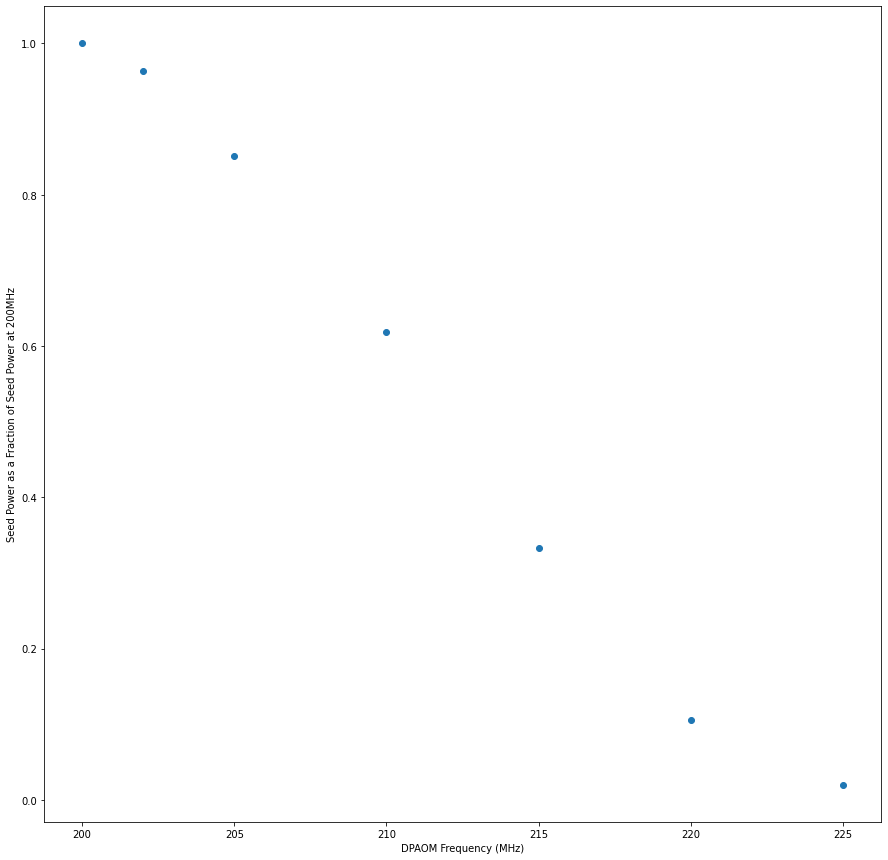

In [ ]:
plt.rcParams["figure.figsize"] = (15, 15)
x = [200, 202,205,210,215,220,225]
y = [1 ,34.9/36.2,23/27,16.7/27,9/27,3/28.5,0.6/30]
plt.ylabel('Seed Power as a Fraction of Seed Power at 200MHz')
plt.xlabel('DPAOM Frequency (MHz)')
plt.plot(x,y,'o')



In [ ]:
h = 21698.452*100*c*10**-12
h2 = 21698.482*100*c*10**-12
h3 = 14504.351*100*c*10**-12

i = 0.004*100*c*10**-12

#print(21698.452*100*c*10**-12)
#print(h+i,h-i)
print(h,h2,h3)


650.5032259875017 650.5041253648756 434.8295037984758


In [ ]:
a = 650.5041012*10**12
a = a*10**-6
b = a-400+125
c = a-400
print(str(a)+' MHz ECDL')
print(str(b)+' MHz Atom Facing')
print(str(c)+' MHz IJD3 WM')

650504101.1999999 MHz ECDL
650503826.1999999 MHz Atom Facing
650503701.1999999 MHz IJD3 WM


In [ ]:
#Theoretical difference 461 and 689 = atom facing 461 and 689
th689 = 434.829121311
th461 = 650.5032259875017
thdiff = th461-th689

print(str(thdiff) + 'THz theoretical difference')

#convert thdiff to MHz
thdiff = thdiff*10**12
thdiff = thdiff*10**-6

215.67410467650166THz theoretical difference


In [ ]:
A = 434.82927*10**12
A = A*10**-6

atomfacing689 = A - 100

In [ ]:
targetatomfacing461 = thdiff + atomfacing689
print(str(targetatomfacing461)+'MHz Target atom facing 461')

targetWM461 = targetatomfacing461 + 400 -125 #no -125 as this isn't on the wavemeter
print(targetWM461)

650503274.6765016MHz Target atom facing 461
650503549.6765016


In [ ]:
print(a-targetWM461)
print(a-targetatomfacing461)

551.5234982967377
826.5234982967377
